> I used US Honey Consumption dataset to find answers of following questions:
> 1. State with highest stocks
> 2. State with highest colonies number
> 3. State with highest production
> 4. State with highest yield per colony
> 5. Top 5 states with highest production
> 6. Top 5 states with highest value of production
> 7. Year with highest mean average price
> 8. Year with highest mean production
> 9. Year with cheapest mean average price
> 10. Year with highest average price
> 11. Distribution of production yearwise
> 12. State with highest colonies

> I played with this dataset, and found that this dataset is clusterable by hopkins test. I learned something that was interesting for me from this clustering.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
data = pd.read_csv("/kaggle/input/us-honey-production-19952021/US_honey_dataset_updated.csv")
data.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


## EDA

In [3]:
data.shape

(1115, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [5]:
data.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

> No null data are present here

In [6]:
data.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


> "Unnamed: 0" column was not required, so dropping this column.

In [7]:
data = data.drop('Unnamed: 0',axis = 1)
data.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

### Visualizing Outliers

> Here, we cannot remove outliers, as there are many. Removing outliers will the data worst, and we will not be able to visualize the data, or we cannot do any analysis on them.

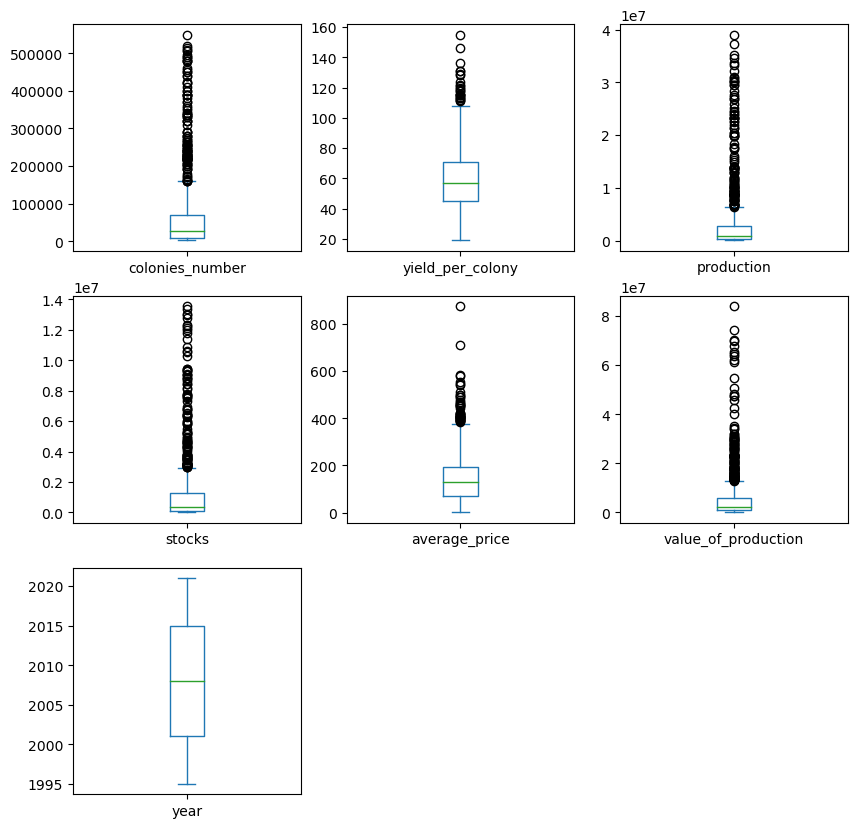

In [8]:
data.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10,10))
plt.show()

### Correlation

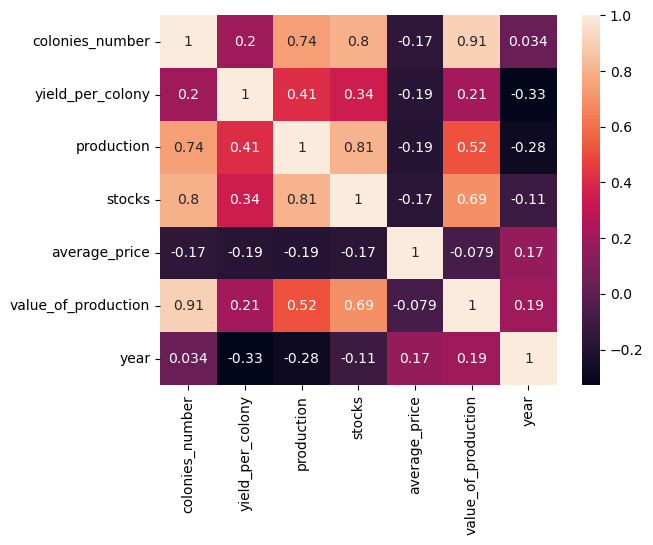

In [9]:
sns.heatmap(data.corr(),annot = True)
plt.show()

> Eliminating the correlation less than 0.5. It will help in know strong relation between the variables

In [10]:
data.corr()[(data.corr()>0.5)&(data.corr()!=1)]

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
colonies_number,NaN,NaN,0.736643,0.800533,NaN,0.905332,NaN
yield_per_colony,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production,0.736643,NaN,NaN,0.807947,NaN,0.520972,NaN
stocks,0.800533,NaN,0.807947,NaN,NaN,0.689202,NaN
average_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value_of_production,0.905332,NaN,0.520972,0.689202,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> States in US

In [11]:
data.state.value_counts()

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

> Unique number of colonies numbers

In [12]:
data['colonies_number'].nunique()

189

> Unique number of states

In [13]:
data.state.nunique()

44

> Visualizing the dependence of production on colonies number.

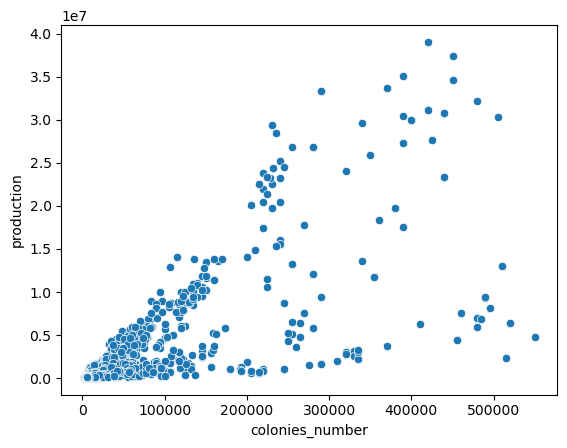

In [14]:
sns.scatterplot(data, x = 'colonies_number',y = 'production')
plt.show()

> Visulizing the dependence of stocks and production on colonies number

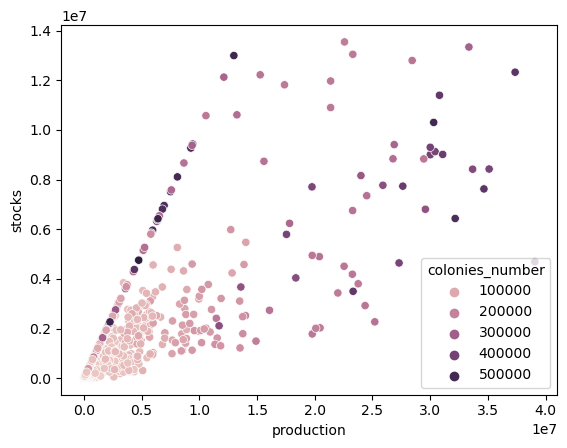

In [15]:
sns.scatterplot(data, x = 'production',y = 'stocks',hue = 'colonies_number')
plt.show()

> Visualizing the dependence of value of production on colonies number

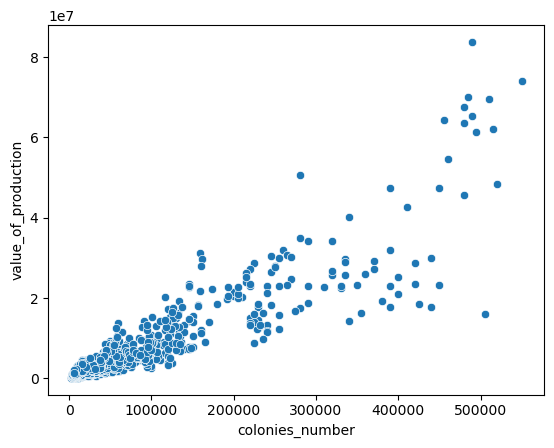

In [16]:
sns.scatterplot(data, x = 'colonies_number',y = 'value_of_production')
plt.show()

> Grouping the data statewise

In [17]:
v0 = data.groupby('state').sum()
v0 = v0.reset_index()
v0 = v0.drop('year',axis = 1)
v0.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000
3,California,10135000,1426,423876000,137611000,2954.06,653982000
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000


### State with highest stocks

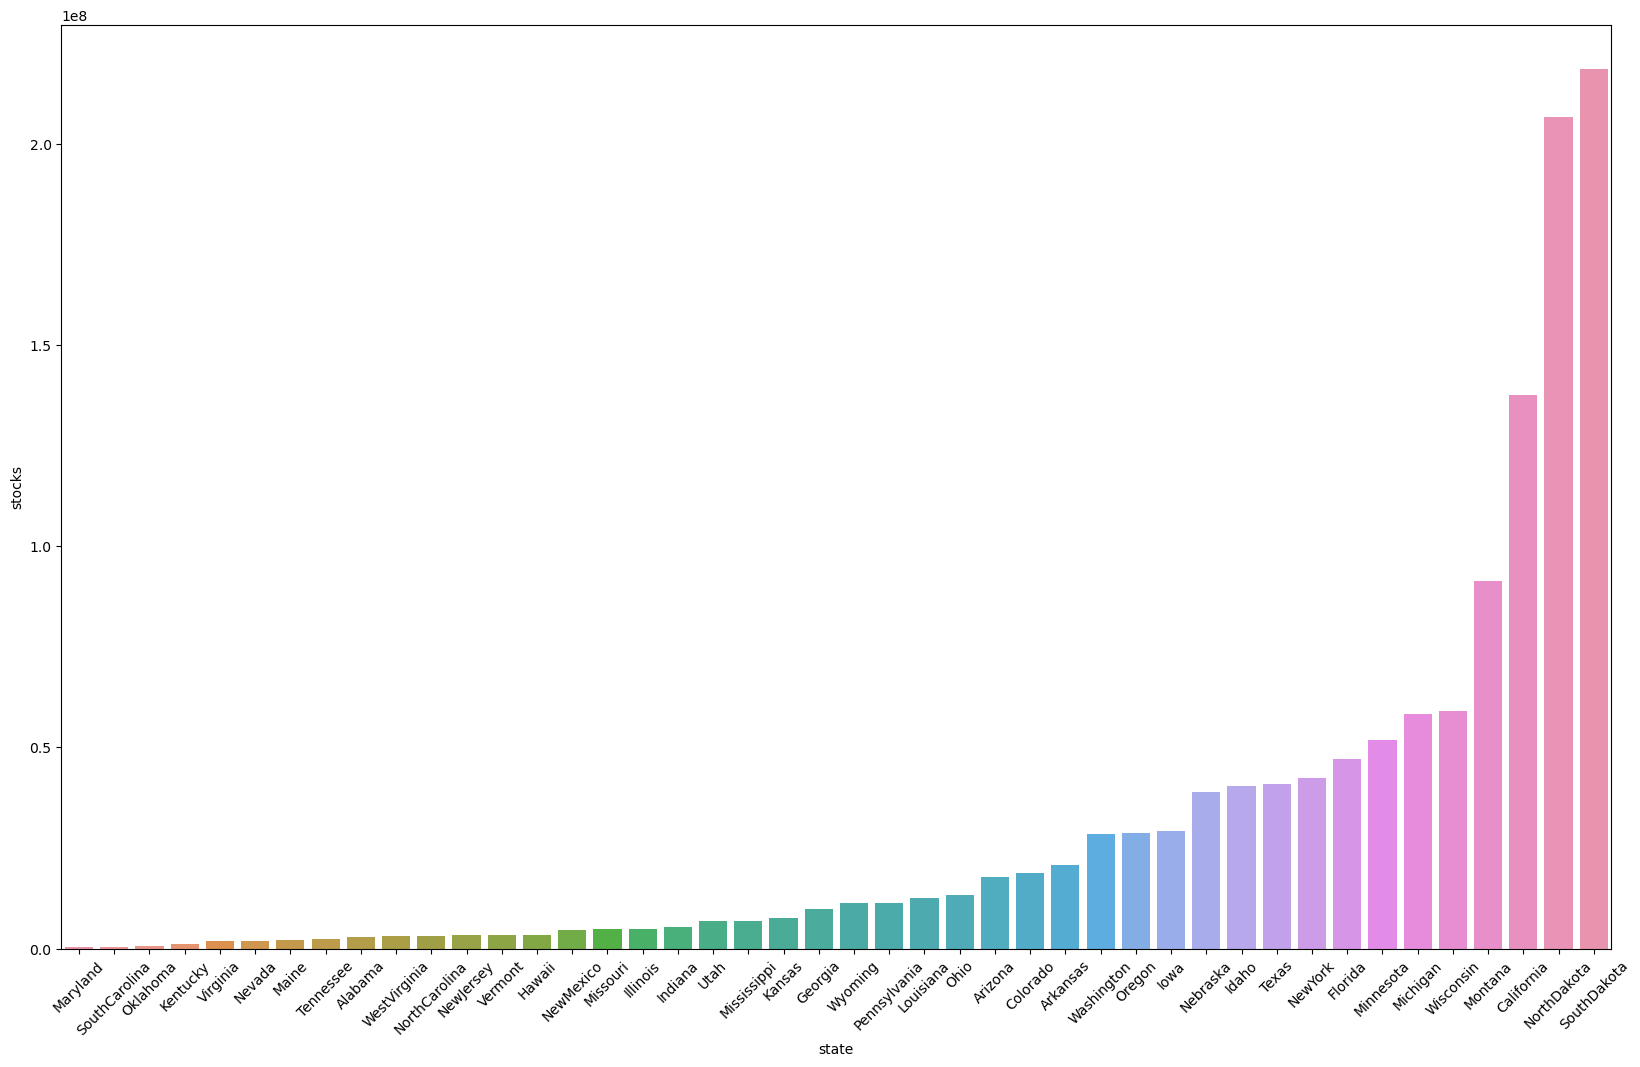

In [18]:
plt.subplots(figsize = (20,12))
sns.barplot(v0,x ='state', y = 'stocks',order = v0.sort_values('stocks').state)
plt.xticks(rotation = 45)
plt.show()

### State with highest colonies number

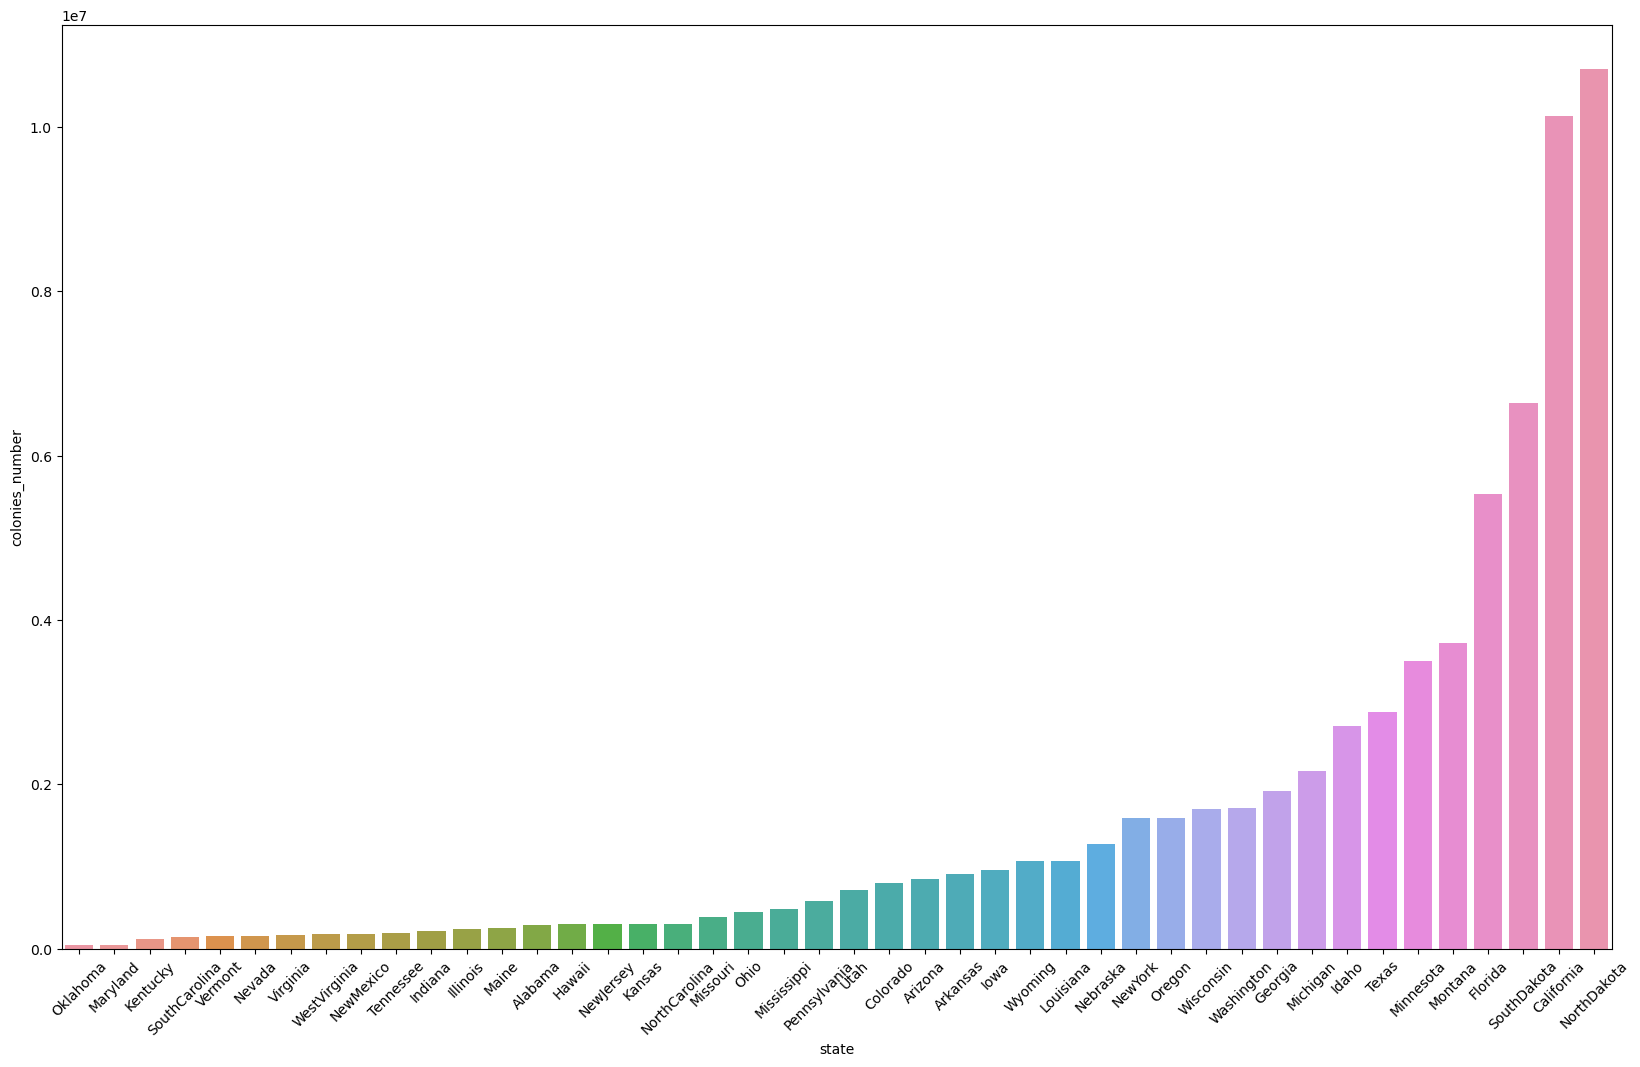

In [19]:
plt.subplots(figsize = (20,12))
sns.barplot(v0,x ='state', y = 'colonies_number',order = v0.sort_values('colonies_number').state)
plt.xticks(rotation = 45)
plt.show()

### State with highest production

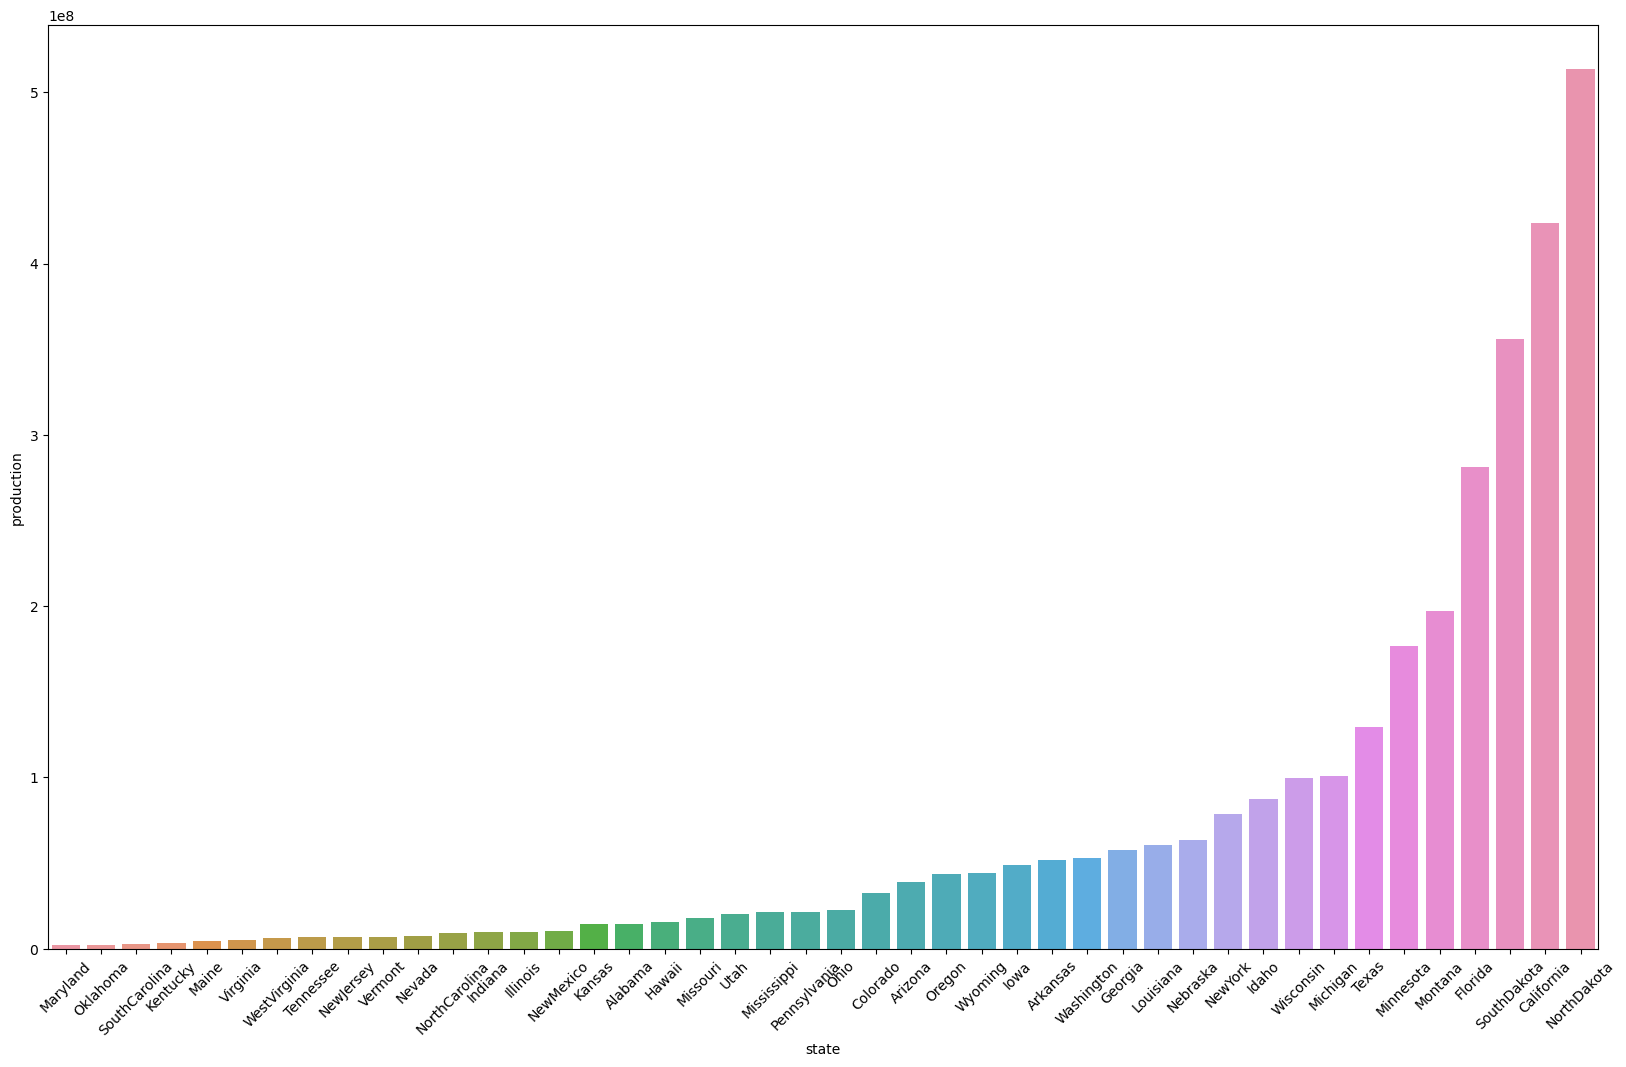

In [20]:
plt.subplots(figsize = (20,12))
sns.barplot(v0,x ='state', y = 'production',order = v0.sort_values('production').state)
plt.xticks(rotation = 45)
plt.show()

### State with highest yield per colony

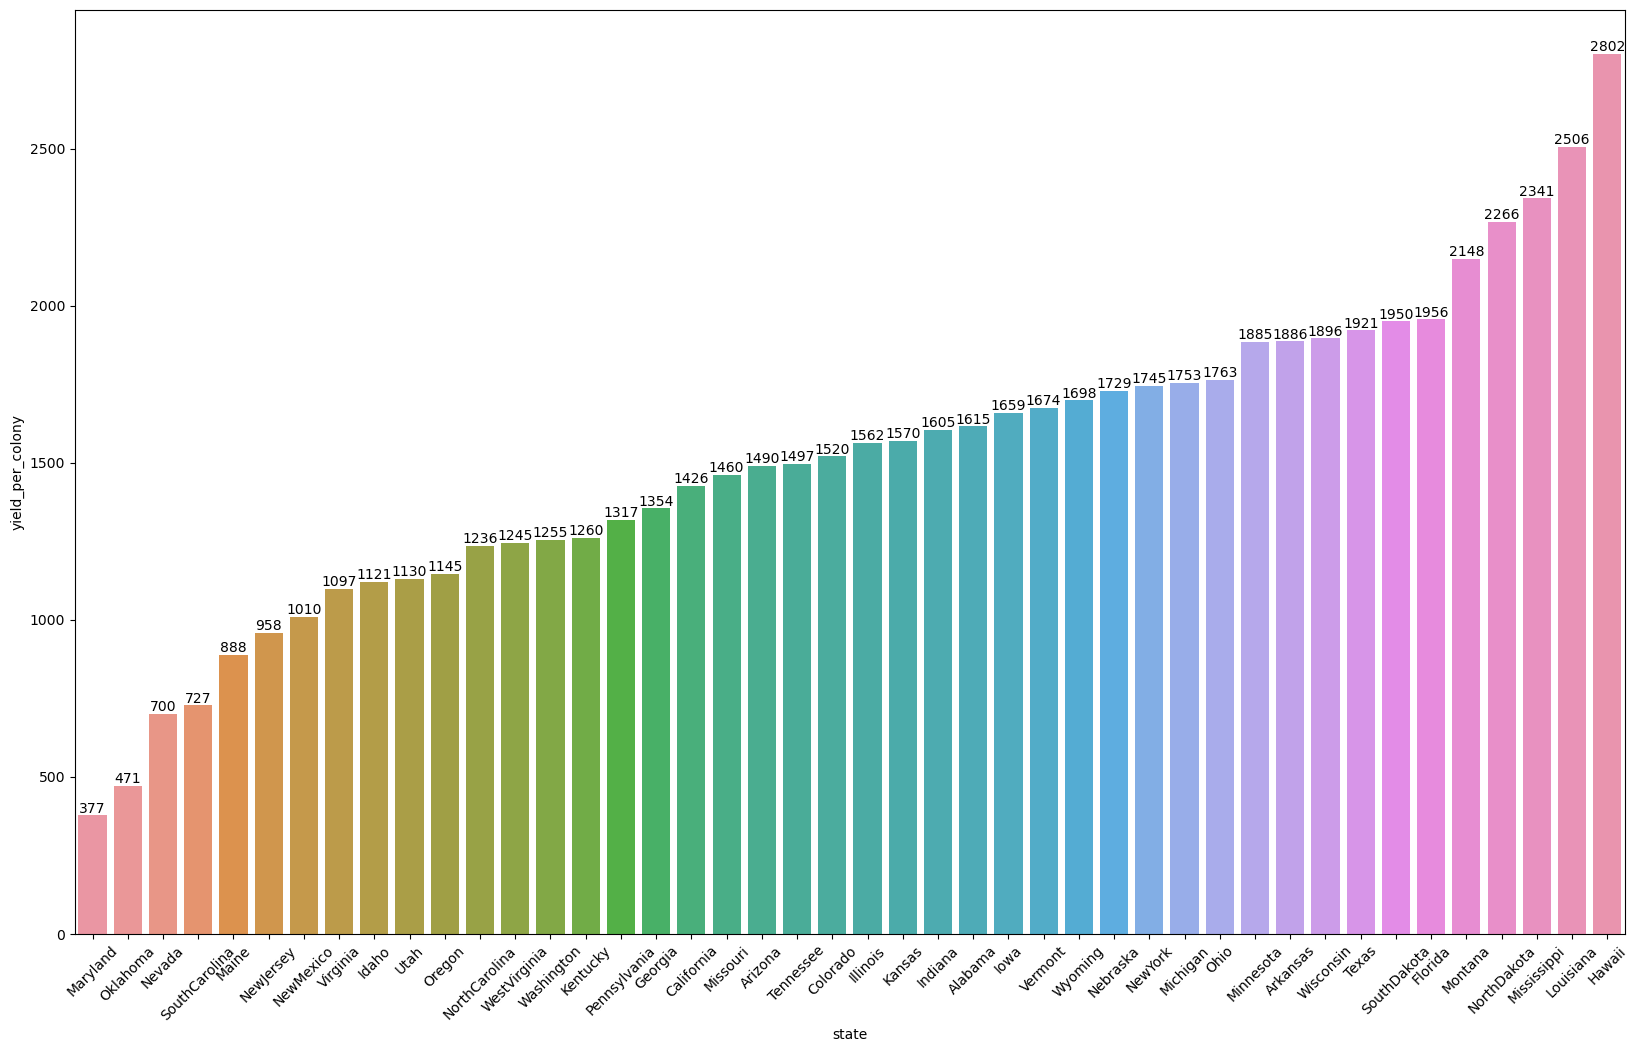

In [21]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v0,x ='state', y = 'yield_per_colony',order = v0.sort_values('yield_per_colony').state)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

### Top 5 states with highest production

In [22]:
data.groupby('state')['production'].sum().sort_values(ascending = False).head()

state
NorthDakota    513742000
California     423876000
SouthDakota    355726000
Florida        280934000
Montana        197173000
Name: production, dtype: int64

### Top 5 states with highest value of production

In [23]:
data.groupby('state')['value_of_production'].sum().sort_values(ascending = False).head()

state
NorthDakota    1186219000
California      653982000
SouthDakota     619095000
Florida         509670000
Montana         406563000
Name: value_of_production, dtype: int64

> Grouping the data yearwise on mean value

In [24]:
v1 = data.groupby('year').mean()
v1 = v1.reset_index()

In [25]:
v1.head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06


### Year with highest mean average price

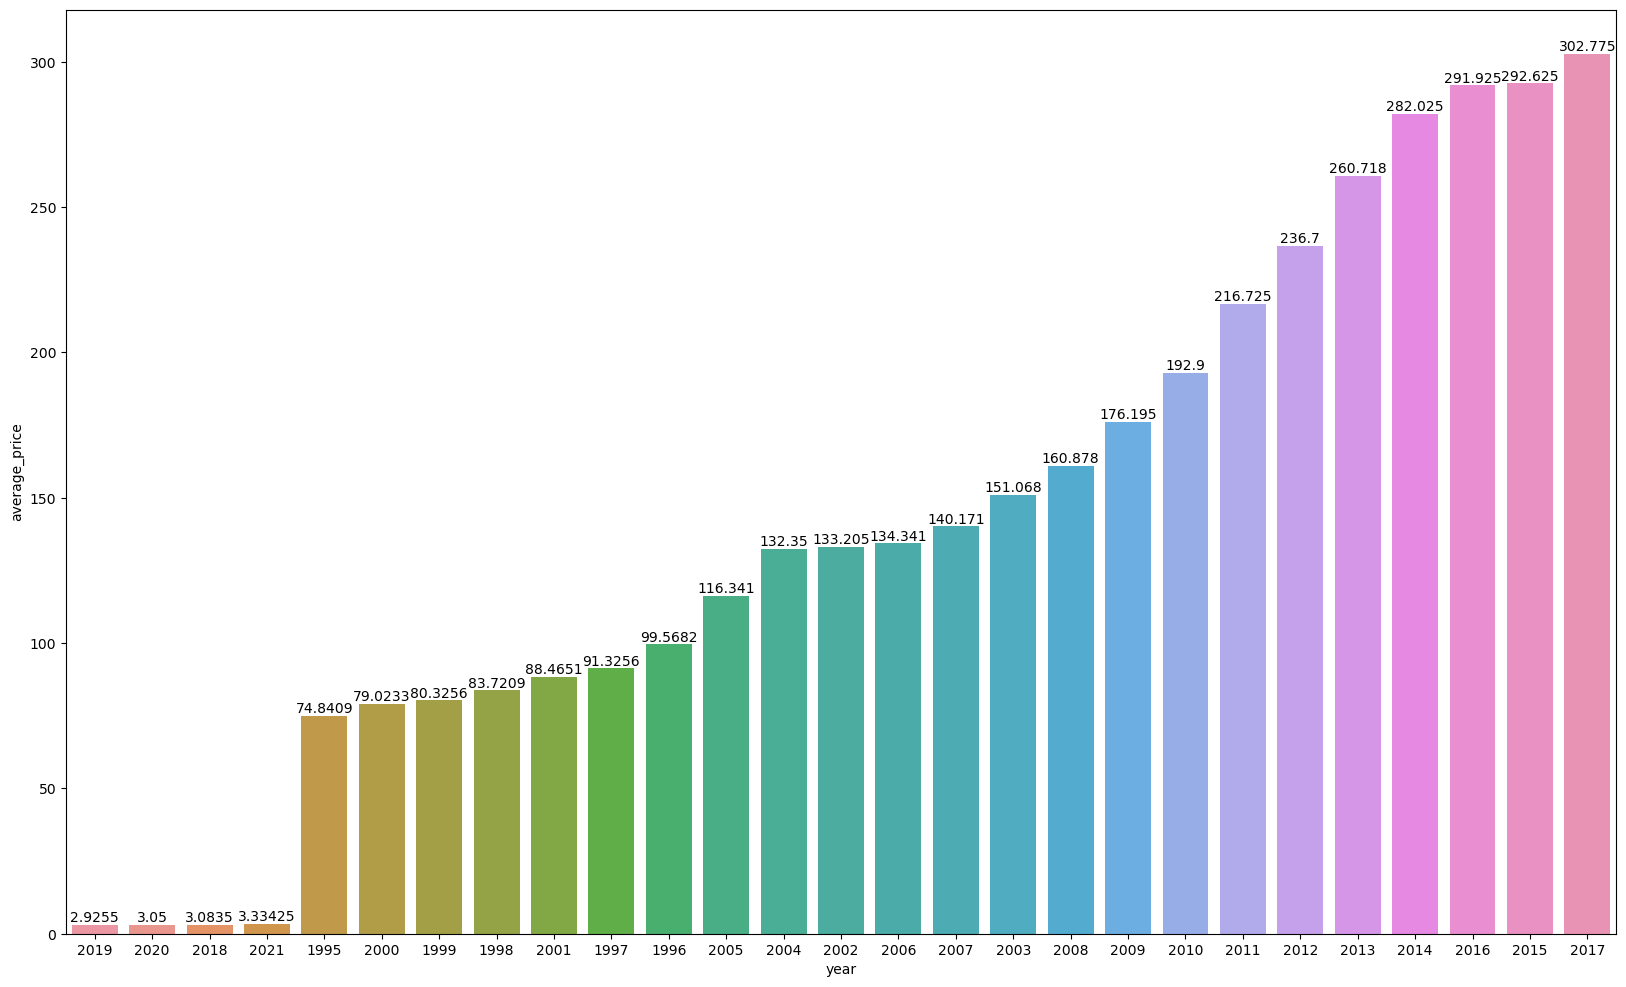

In [26]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v1,x='year',y = 'average_price',order = v1.sort_values('average_price').year,errwidth =  0)
ax.bar_label(ax.containers[0])
plt.show()

### Year with highest mean production

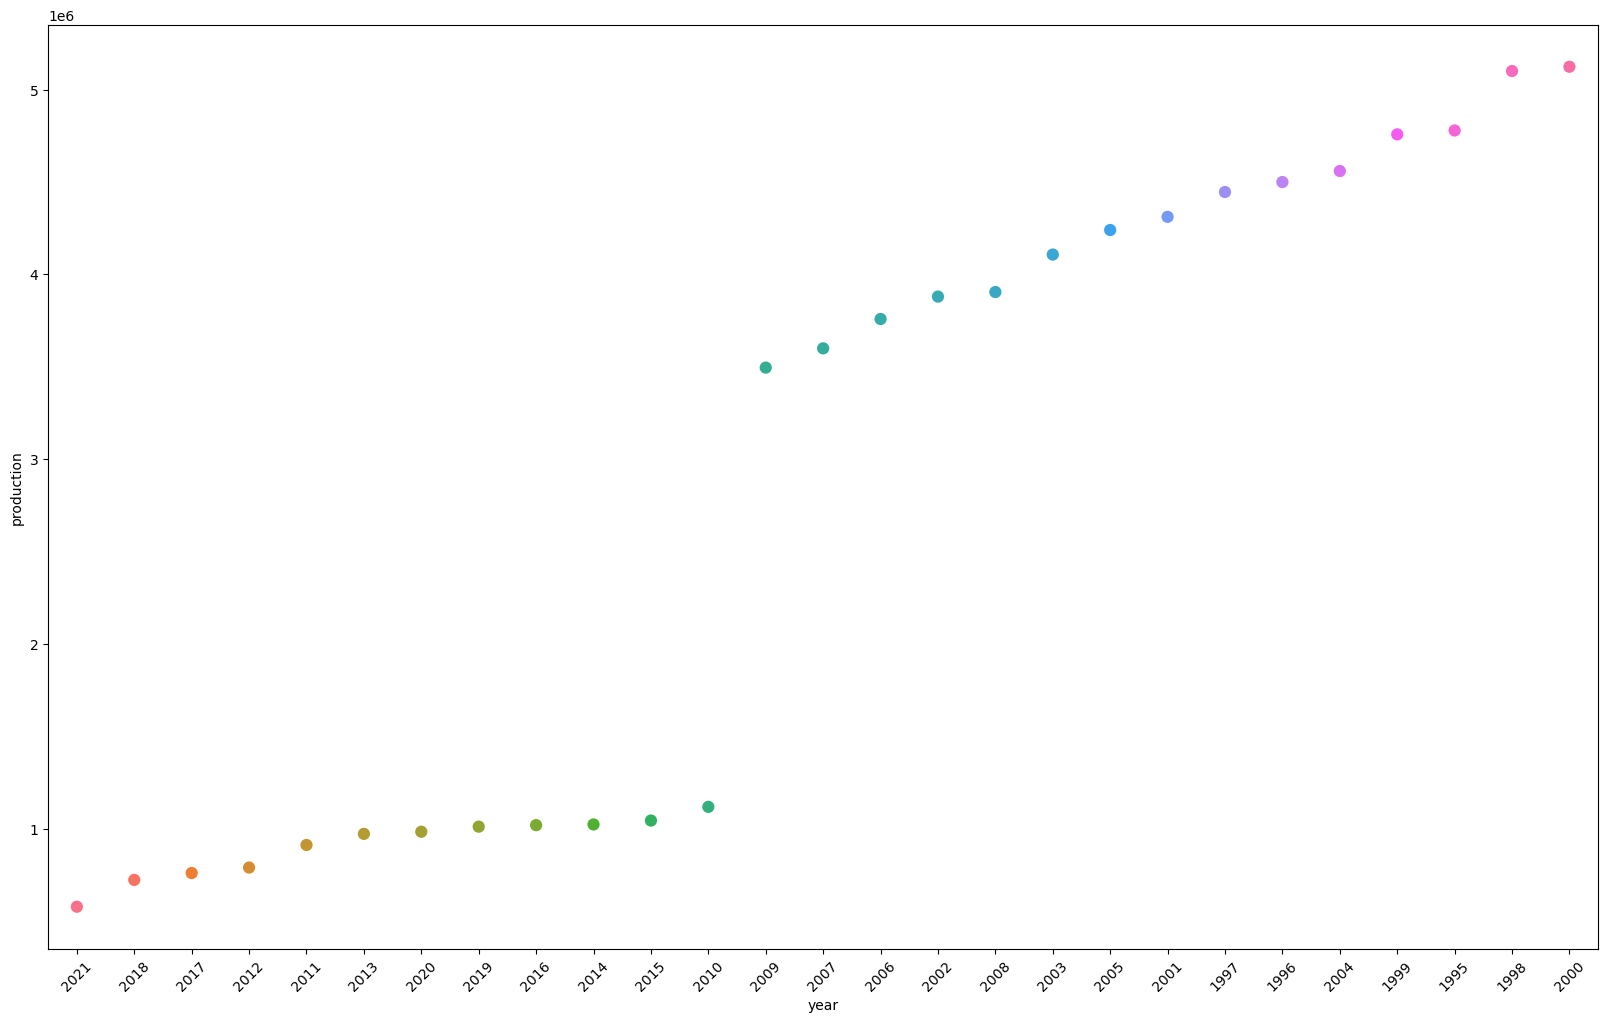

In [27]:
plt.subplots(figsize = (20,12))
sns.pointplot(v1,x ='year', y = 'production' ,palette = 'husl',order = v1.sort_values('production').year)
plt.xticks(rotation = 45)
plt.show()

### Year with cheapest mean average price

In [28]:
v2 =data.groupby('year')['average_price'].sum().sort_values().head(1)
v2

year
2019    117.02
Name: average_price, dtype: float64

> Grouping data yearwise

In [29]:
v3 = data.groupby('year').sum()
v3 = v3.reset_index()
v3.head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,2639000,2944,210272000,42130000,3293.0,137324000
1,1996,2560000,3083,197995000,46924000,4381.0,179774000
2,1997,2565000,2965,191176000,68854000,3927.0,145598000
3,1998,2618000,3008,219321000,80474000,3600.0,145998000
4,1999,2674000,2815,204585000,79107000,3454.0,124187000


### Year with highest average price

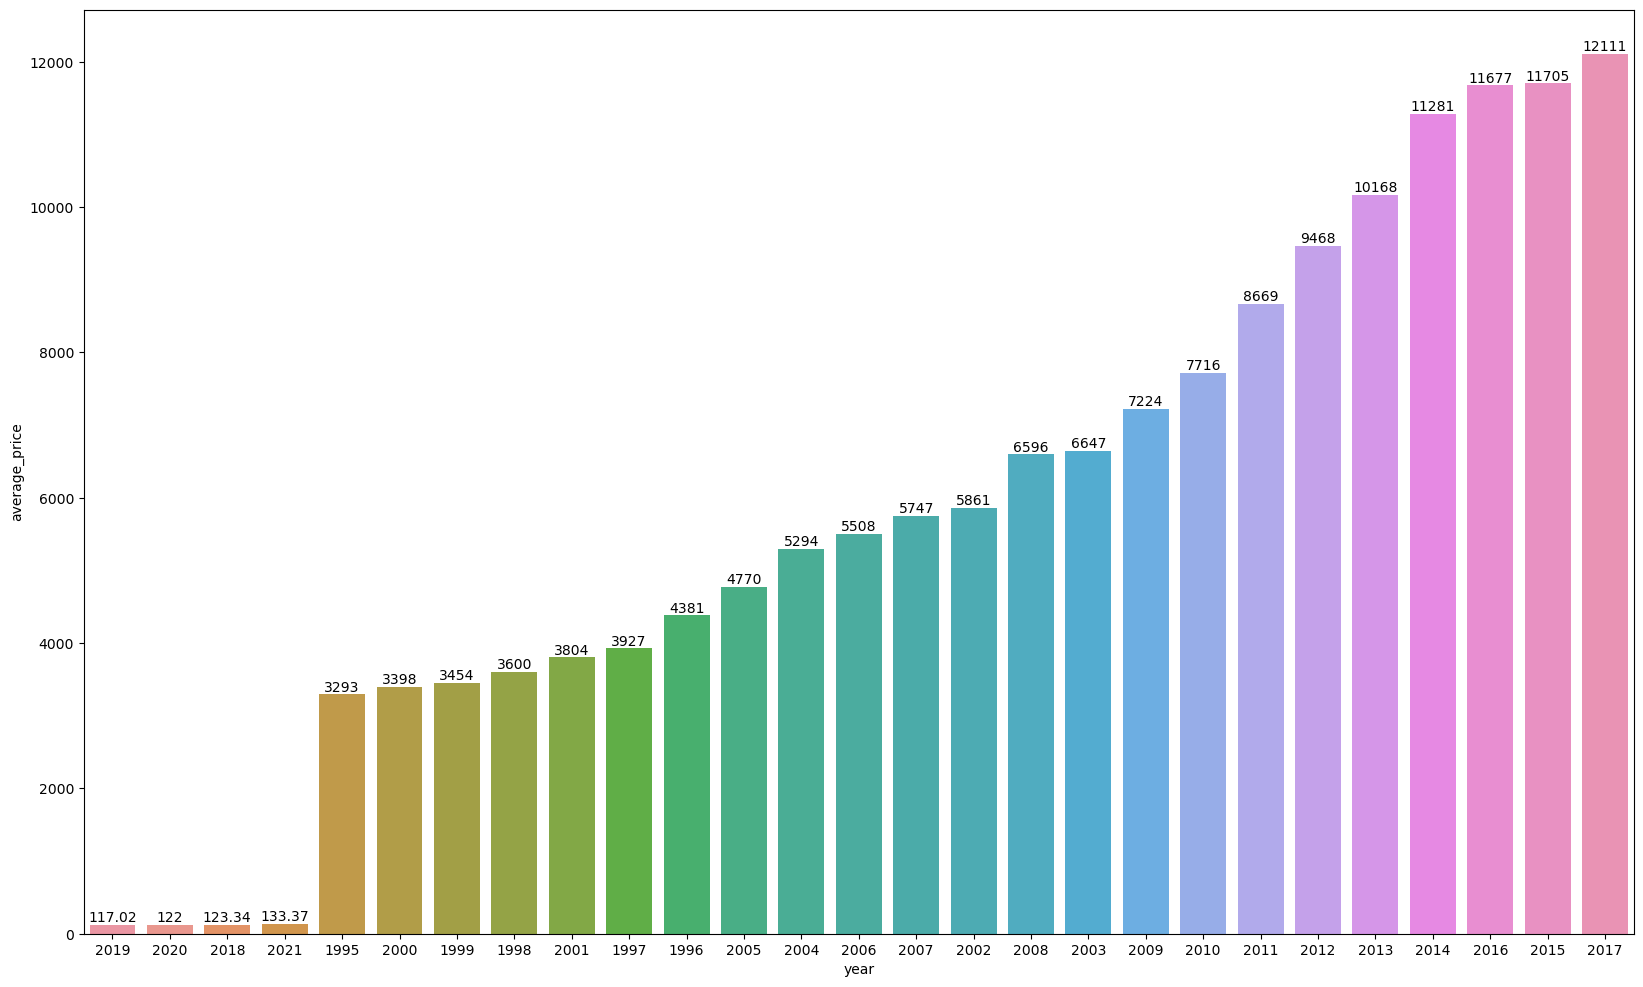

In [30]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v3,x = 'year', y = 'average_price',order = v3.sort_values('average_price').year)
ax.bar_label(ax.containers[0])
plt.show()

### Distribution of production yearwise

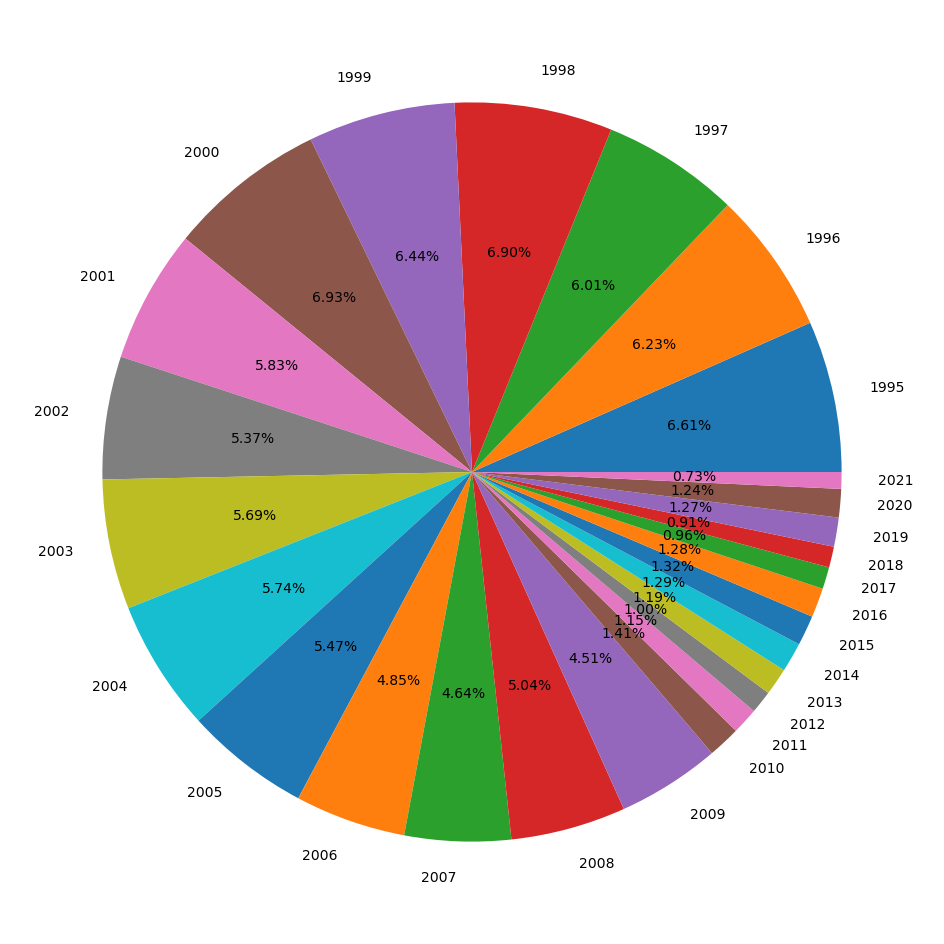

In [31]:
plt.subplots(figsize = (20,12))
plt.pie(v3['production'], labels = v3['year'],autopct = "%1.2f%%")
plt.show()

### State with Highest colonies 

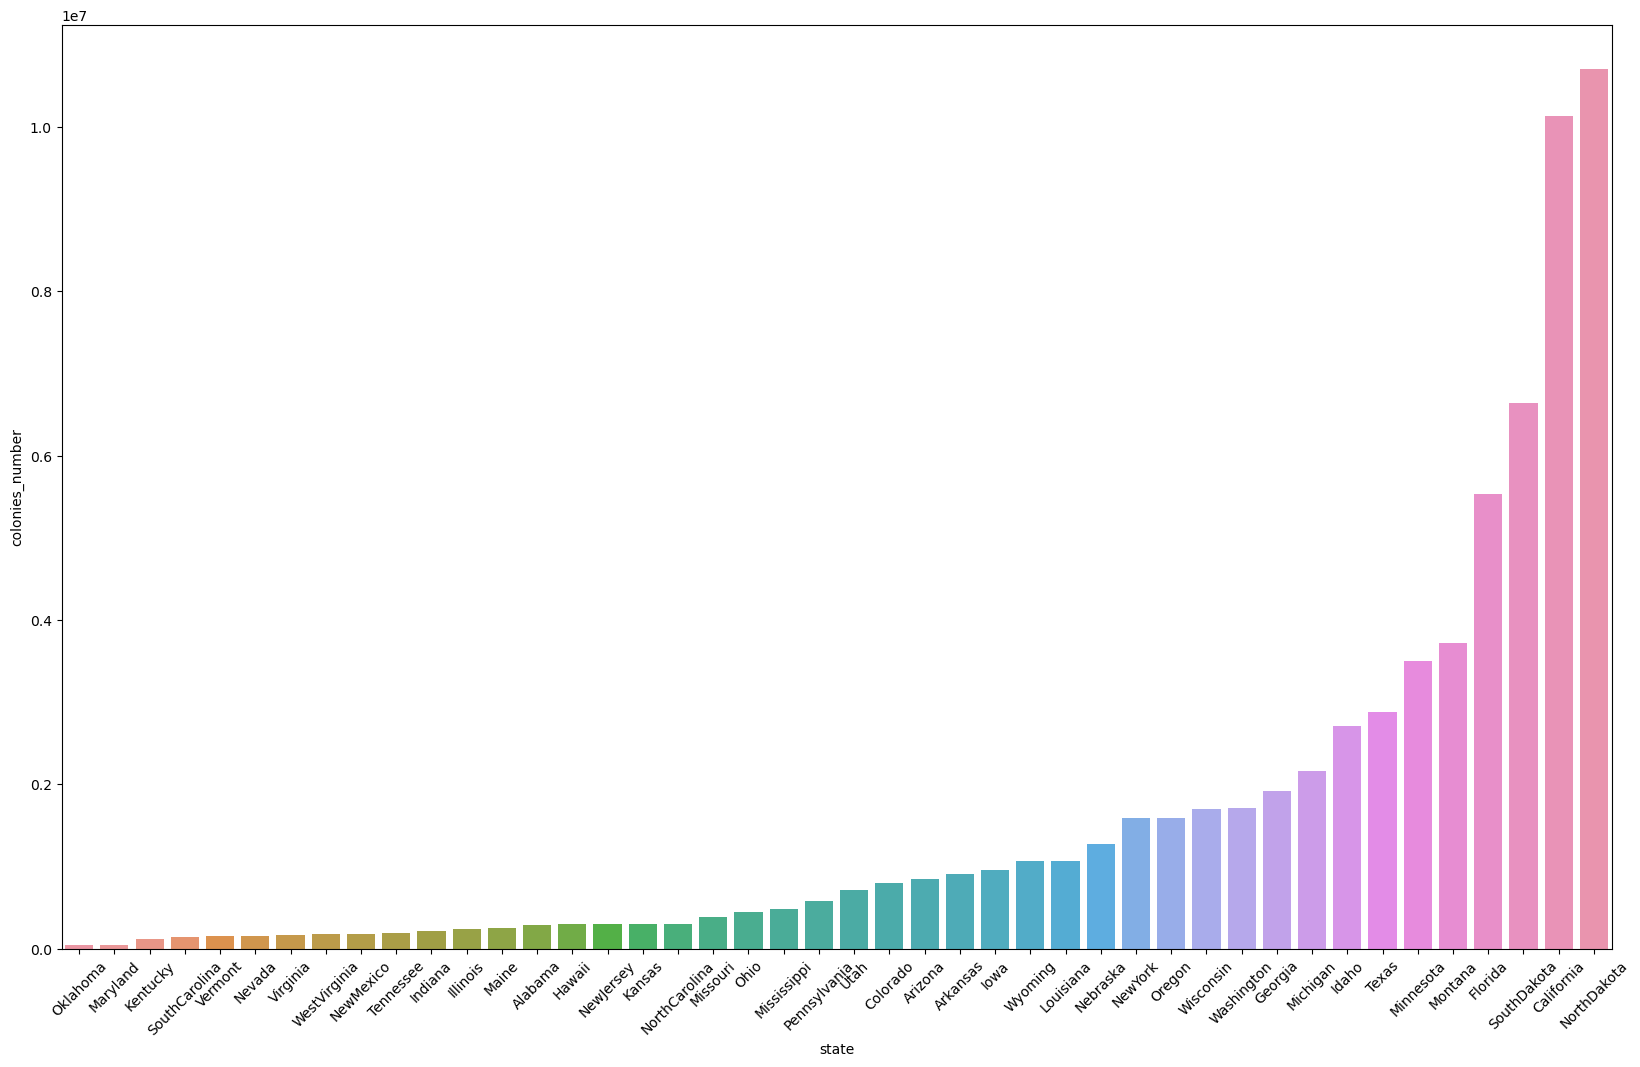

In [32]:
plt.subplots(figsize = (20,12))
sns.barplot(v0,x = 'state', y = 'colonies_number',order = v0.sort_values('colonies_number').state)
plt.xticks(rotation = 45)
plt.show()

> There are 44 states in this dataset. To convert from categorical to numerical, I used target encoding, as there are many categorical values.

## Target Encoding

In [33]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols='state')
newdf = encoder.fit_transform(data['state'],data['value_of_production'])
newdf.head()

,state
0,2.589983e+06
1,3.359736e+06
2,3.706426e+06
3,1.806506e+07
4,3.460508e+06


> Concatenating the data

In [34]:
changed_data = pd.concat([newdf,data.drop('state',axis=1)],axis = 1)
changed_data.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,2.589983e+06,16000,58,928000,28000,62.0,575000,1995
1,3.359736e+06,52000,79,4108000,986000,68.0,2793000,1995
2,3.706426e+06,50000,60,3000000,900000,64.0,1920000,1995
3,1.806506e+07,420000,93,39060000,4687000,60.0,23436000,1995
4,3.460508e+06,45000,60,2700000,1404000,68.0,1836000,1995


> Visualizing new correlation

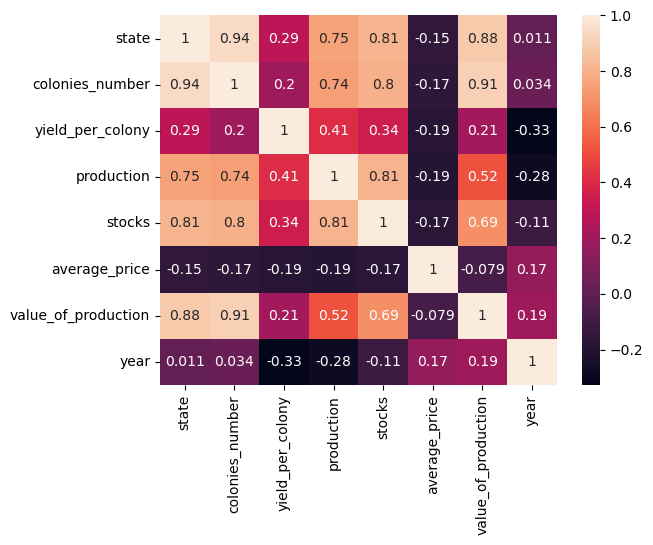

In [35]:
sns.heatmap(changed_data.corr(),annot = True)
plt.show()

## Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(changed_data))
X.head()

,0,1,2,3,4,5,6,7
0,-0.569729,-0.501461,-0.087474,-0.345992,-0.558725,-0.735046,-0.538582,-1.629365
1,-0.431208,-0.112719,0.966131,0.226083,-0.091097,-0.678952,-0.304003,-1.629365
2,-0.368820,-0.134316,0.012869,0.026757,-0.133076,-0.716348,-0.396333,-1.629365
3,2.215087,3.861079,1.668535,6.513876,1.715470,-0.753743,1.879236,-1.629365
4,-0.413074,-0.188308,0.012869,-0.027213,0.112941,-0.678952,-0.405217,-1.629365


In [37]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


> Checkin Hopkins statistic

In [38]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale


In [39]:
hopkins(scale(X),X.shape[0])

0.0694541916870311

> The value is tending to zero, it means it is clusterable.

In [40]:
pip install screeplot

  Preparing metadata (setup.py) ... - done
  Created wheel for screeplot: filename=screeplot-0.0.2-py3-none-any.whl size=2053 sha256=ee1ff5a8ea7aaf7abd3dbd5fccd07e1cf7f0fb8a64d8169bade12d760b205d01
  Stored in directory: /root/.cache/pip/wheels/74/31/34/b356f32899a4da1f66db38f10ed9afb18720016c6a08f150ae
Successfully built screeplot
Note: you may need to restart the kernel to use updated packages.


> Determining number of components for PCA

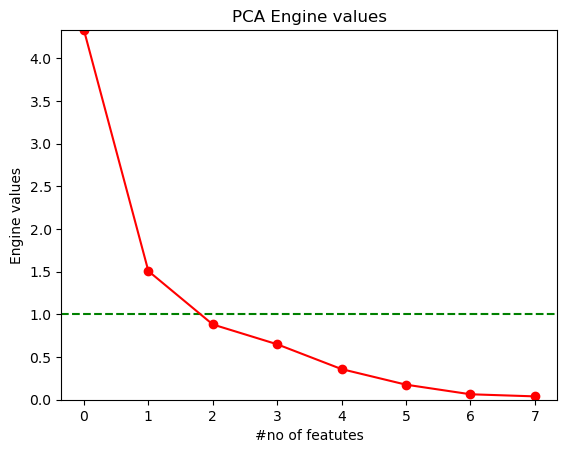

In [41]:
from screeplot import scree
scree.scree_plot(X)


## Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1
0,-0.957412,-1.559025
1,0.022049,-2.025177
2,-0.283650,-1.556201
3,7.458921,-2.022399
4,-0.251631,-1.557558


In [43]:
pca.explained_variance_ratio_

array([0.54083682, 0.18824369])

## K Means Clustering

> Determining the number of clusters

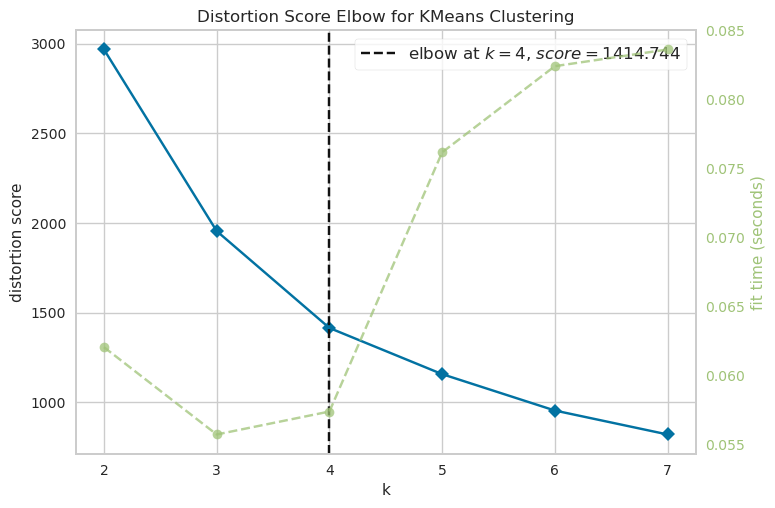

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k =(2,8))
visualizer.fit(X)
visualizer.show()
plt.show()

## Prediction

In [45]:
kmeans = KMeans(n_clusters = 4,random_state = 30, max_iter = 1000)
y = kmeans.fit_predict(X)

In [46]:
kmeans.inertia_

1414.1597035733473

### Silhouette Score

In [47]:
from sklearn import metrics
metrics.silhouette_score(X,y)

0.4502887008177897

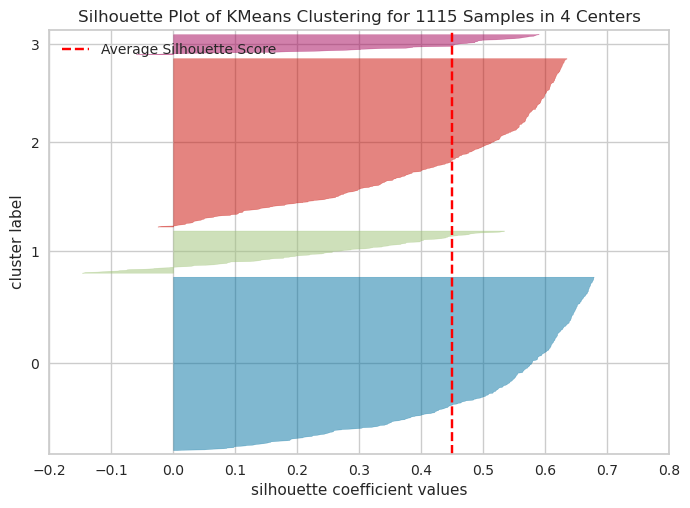

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer3 = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer3.fit(X)
visualizer3.show()
plt.show()

### Inter cluster distance

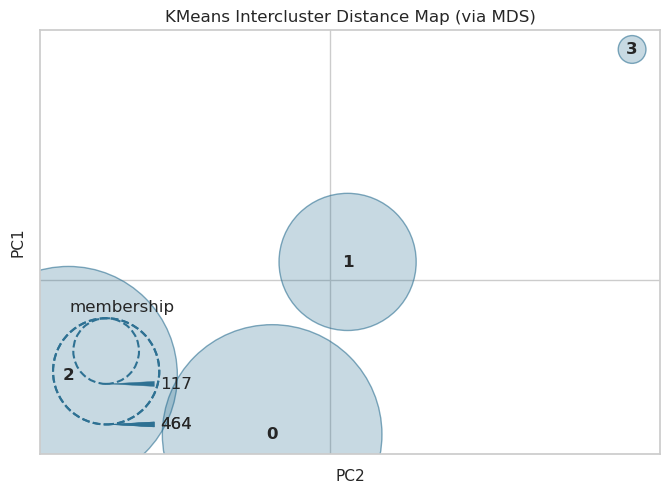

In [49]:
from yellowbrick.cluster import InterclusterDistance
visualizer4 = InterclusterDistance(kmeans)
visualizer4.fit(X)
visualizer4.show()
plt.show()

> Centroids

In [50]:
centroid = kmeans.cluster_centers_
centroid

array([[-1.00036787,  0.86834539],
       [ 2.44258384,  0.30394829],
       [-0.46097213, -1.0226068 ],
       [ 7.25508219,  0.42604477]])

In [51]:
labels = pd.DataFrame(index = y)
labels = labels.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
labels.reset_index(level = 0,inplace = True)
labels = labels.rename(columns = {'index':'Labels'})
labels.head(2)

,Labels
0,Cluster 3
1,Cluster 3


> Visualizing Clusters from principal components

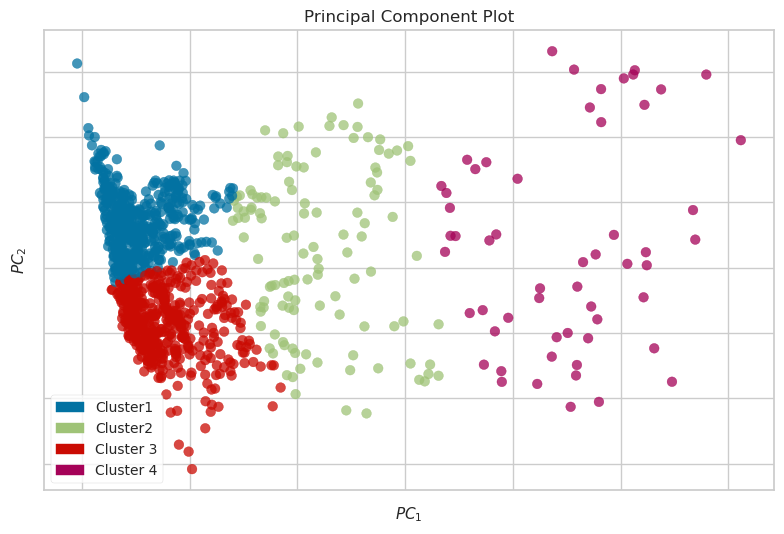

In [52]:
from yellowbrick.features import PCA
classes = ['Cluster1','Cluster2','Cluster 3','Cluster 4']
visualizer5 = PCA(scale = True,classes = classes)
visualizer5.fit_transform(X,y)
visualizer5.show()
plt.show()

> Clusters are made from principal components, and the drawback is that, we cannot know, which features are useful here to cluster the data. Visualizing centroids of the clusters.

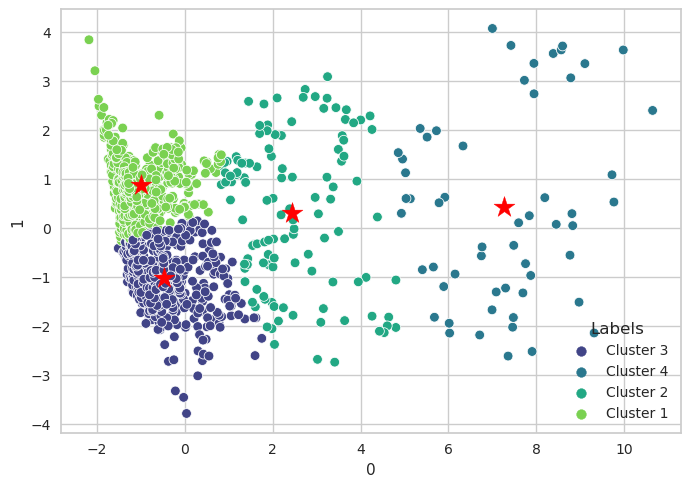

In [53]:
sns.scatterplot(data,x = X[0],y = X[1],hue = labels['Labels'],palette = 'viridis')
plt.scatter(x = centroid[:,0],y =centroid[:,1],c='red',s = 250,marker='*')
plt.show() 

> Concatenating the labels of clusters and the original data

In [54]:
cluster_df = pd.concat([data,labels],axis = 1)
cluster_df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,Labels
0,Alabama,16000,58,928000,28000,62.0,575000,1995,Cluster 3
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,Cluster 3
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,Cluster 3
3,California,420000,93,39060000,4687000,60.0,23436000,1995,Cluster 4
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,Cluster 3


### Cluster 1

In [55]:
Cluster1 = cluster_df[cluster_df['Labels']=='Cluster 1']
Cluster1.shape[0]

478

### Cluster 2

In [56]:
Cluster2 = cluster_df[cluster_df['Labels']=='Cluster 2']
Cluster2.shape[0]

117

### Cluster 3

In [57]:
Cluster3 = cluster_df[cluster_df['Labels']=='Cluster 3']
Cluster3.shape[0]

464

Cluster 4

In [58]:
Cluster4 = cluster_df[cluster_df['Labels']=='Cluster 4']
Cluster4.shape[0]

56

> We know there are 4 clusters, but we do not know on what basis these clusters are made. Let's visualize and find the relations

In [59]:
c1 = Cluster1.groupby('state').sum()
c1 = c1.reset_index()
c1['stocks in millions'] = c1['stocks']/1000000
c1.sort_values(by = 'stocks in millions',ascending = False).head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,stocks in millions
15,Michigan,1047000,652,17744000,17744000,1749.97,134265000,24186,17.744
6,Idaho,1420000,526,23203000,16087000,1863.71,86198000,30210,16.087
35,Washington,1076000,602,18661000,14539000,2135.36,88909000,30210,14.539
37,Wisconsin,636000,684,14014000,14014000,1841.87,88968000,24186,14.014
27,Oregon,1084000,582,17621000,13533000,2185.40,77799000,32215,13.533


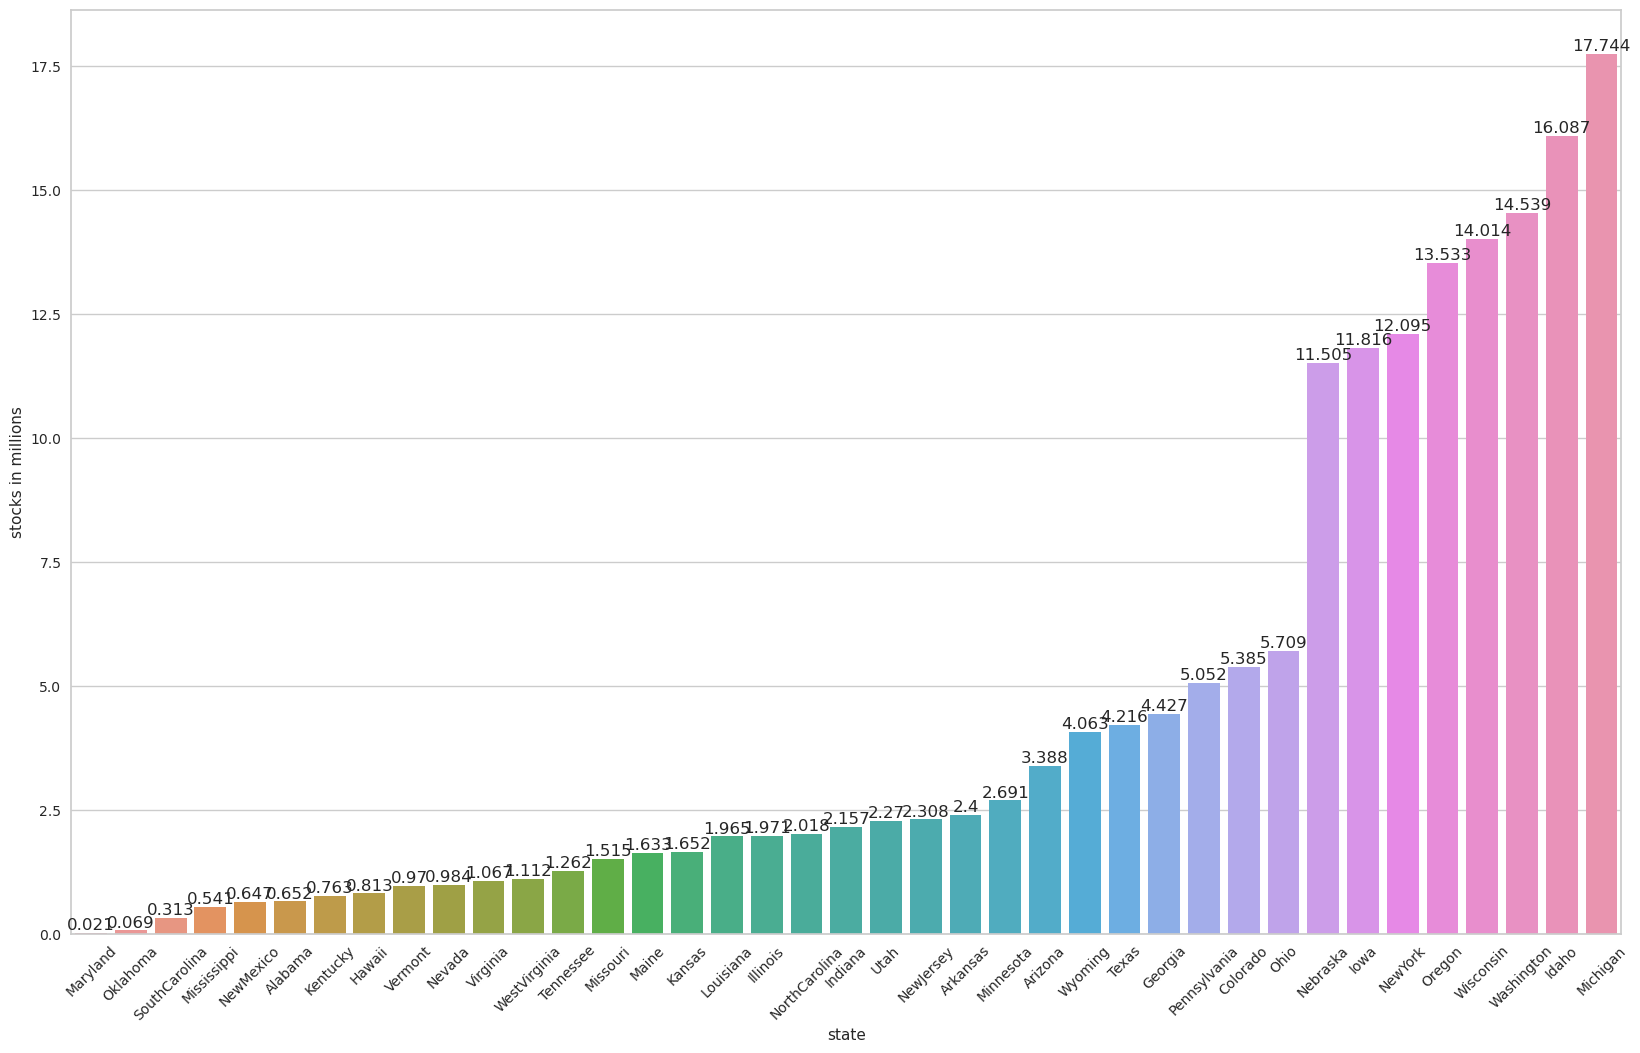

In [60]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(c1, x = 'state',y = 'stocks in millions',order = c1.sort_values('stocks in millions').state)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [61]:
c2 = Cluster2.groupby('state').sum()
c2 = c2.reset_index()
c2['stocks in millions'] = c2['stocks']/1000000
c2.sort_values(by = 'stocks in millions',ascending = False).head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,stocks in millions
4,Montana,3619000,2068,188693000,89459000,2895.17,400966000,52221,89.459
5,SouthDakota,2930000,714,108053000,65140000,1441.18,264686000,24105,65.140
3,Minnesota,3123000,1707,173890000,49217000,2523.57,266491000,48162,49.217
1,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216,47.037
0,California,4245000,500,53973000,34439000,1650.06,304517000,26192,34.439


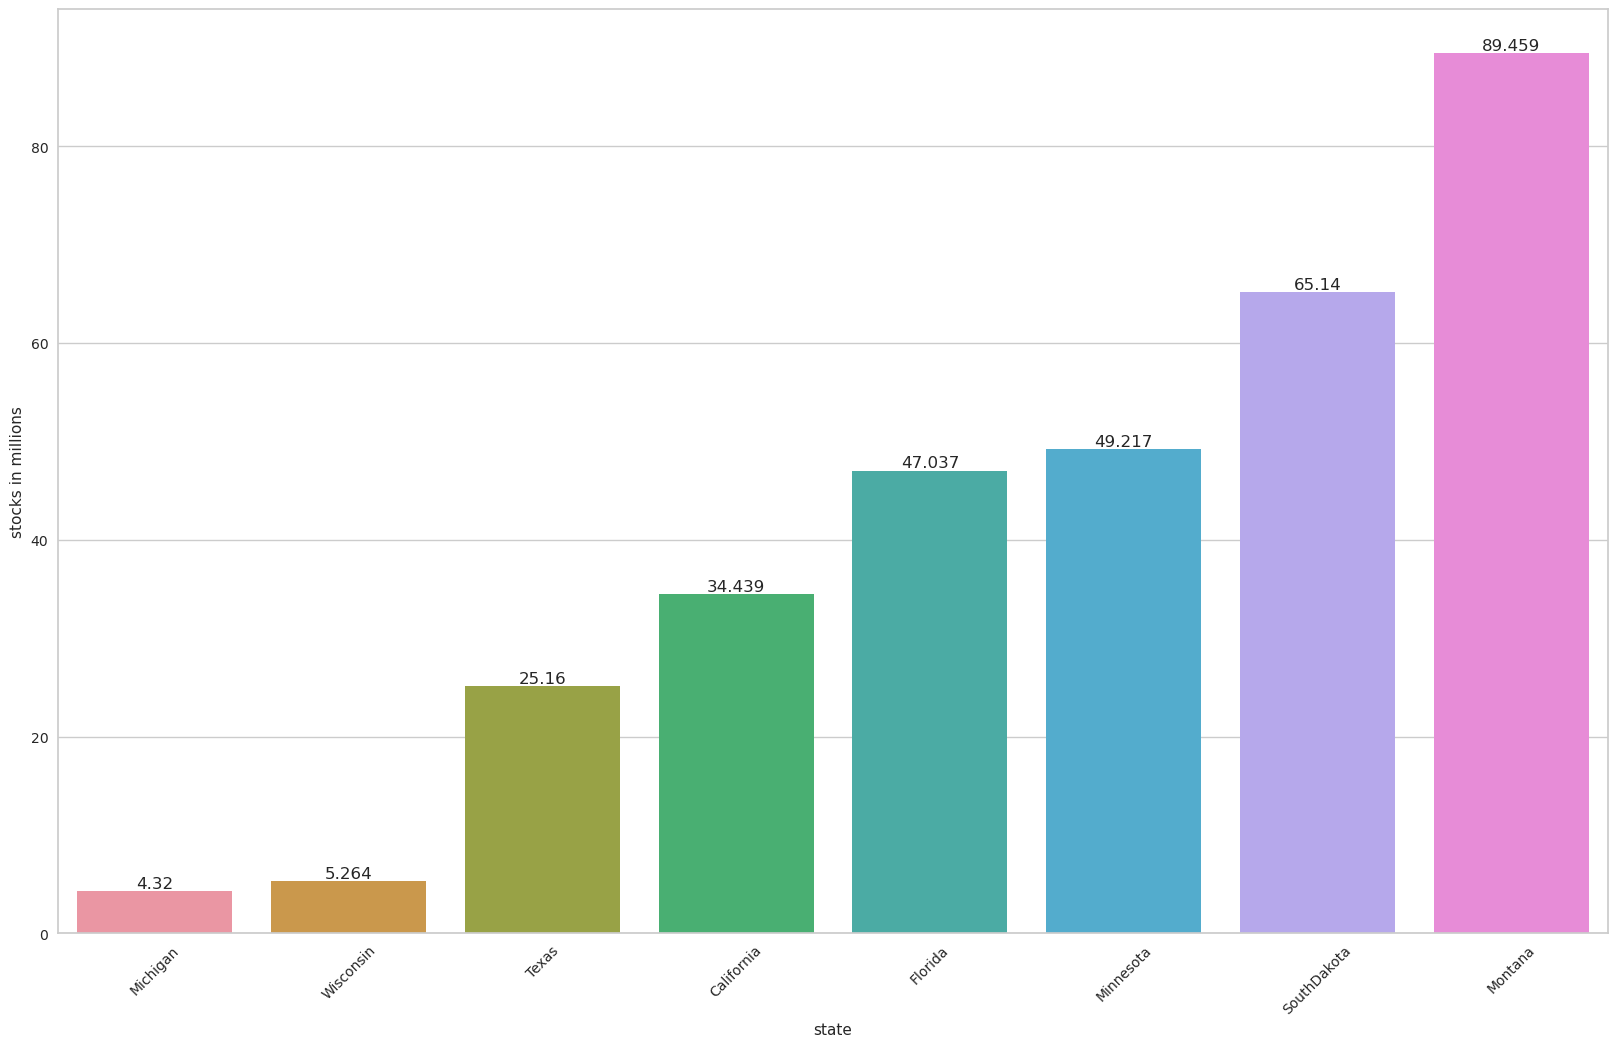

In [62]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(c2, x = 'state',y = 'stocks in millions',order = c2.sort_values('stocks in millions').state)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [63]:
c3 = Cluster3.groupby('state').sum()
c3 = c3.reset_index()
c3['stocks in millions'] = c3['stocks']/1000000
c3.sort_values(by = 'stocks in millions',ascending = False).head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,stocks in millions
37,Wisconsin,973000,1121,77796000,39888000,1497.0,81643000,28032,39.888
15,Michigan,1031000,1005,74679000,36337000,1452.0,74072000,28034,36.337
23,NewYork,919000,1081,66349000,30440000,1623.0,69181000,30030,30.440
19,Nebraska,708000,992,50564000,27432000,1337.0,46986000,28021,27.432
6,Idaho,1285000,595,63985000,24416000,1006.0,53338000,24006,24.416


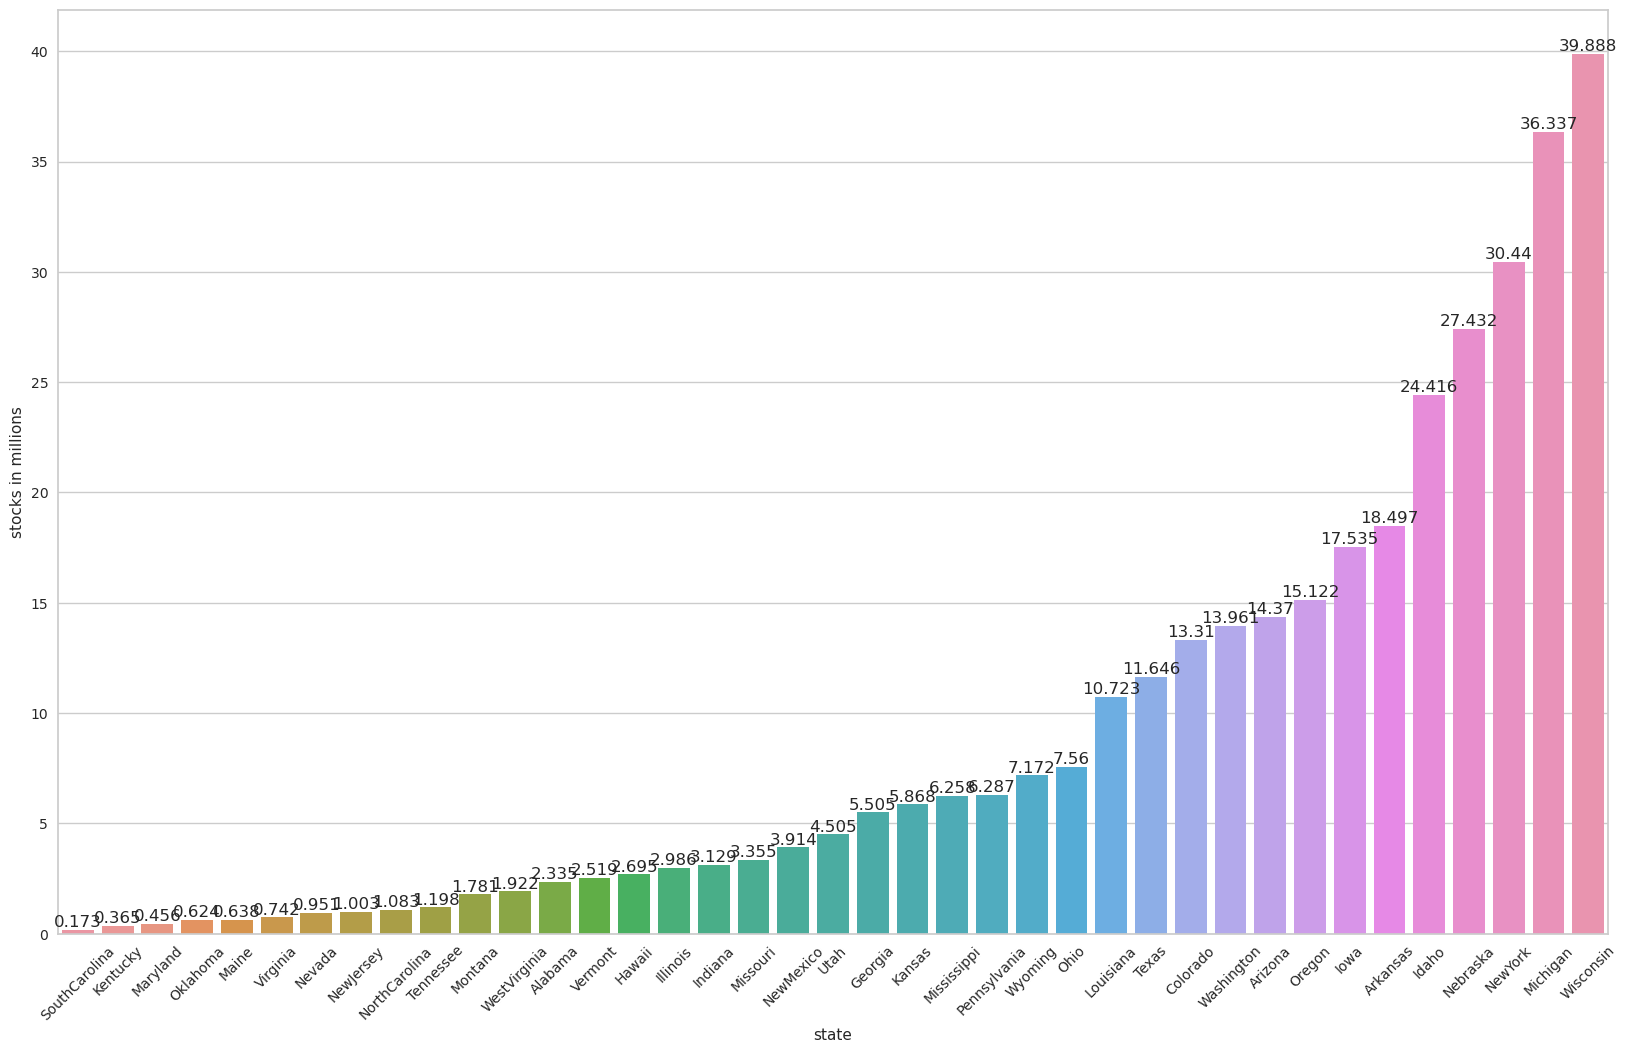

In [64]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(c3, x = 'state',y = 'stocks in millions',order = c3.sort_values('stocks in millions').state)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [65]:
c4 = Cluster4.groupby('state').sum()
c4 = c4.reset_index()
c4['stocks in millions'] = c4['stocks']/1000000
c4.sort_values(by = 'stocks in millions',ascending = False).head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,stocks in millions
1,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216,206.707
2,SouthDakota,3709000,1236,247673000,153494000,1450.33,354409000,30111,153.494
0,California,5890000,926,369903000,103172000,1304.00,349465000,28024,103.172


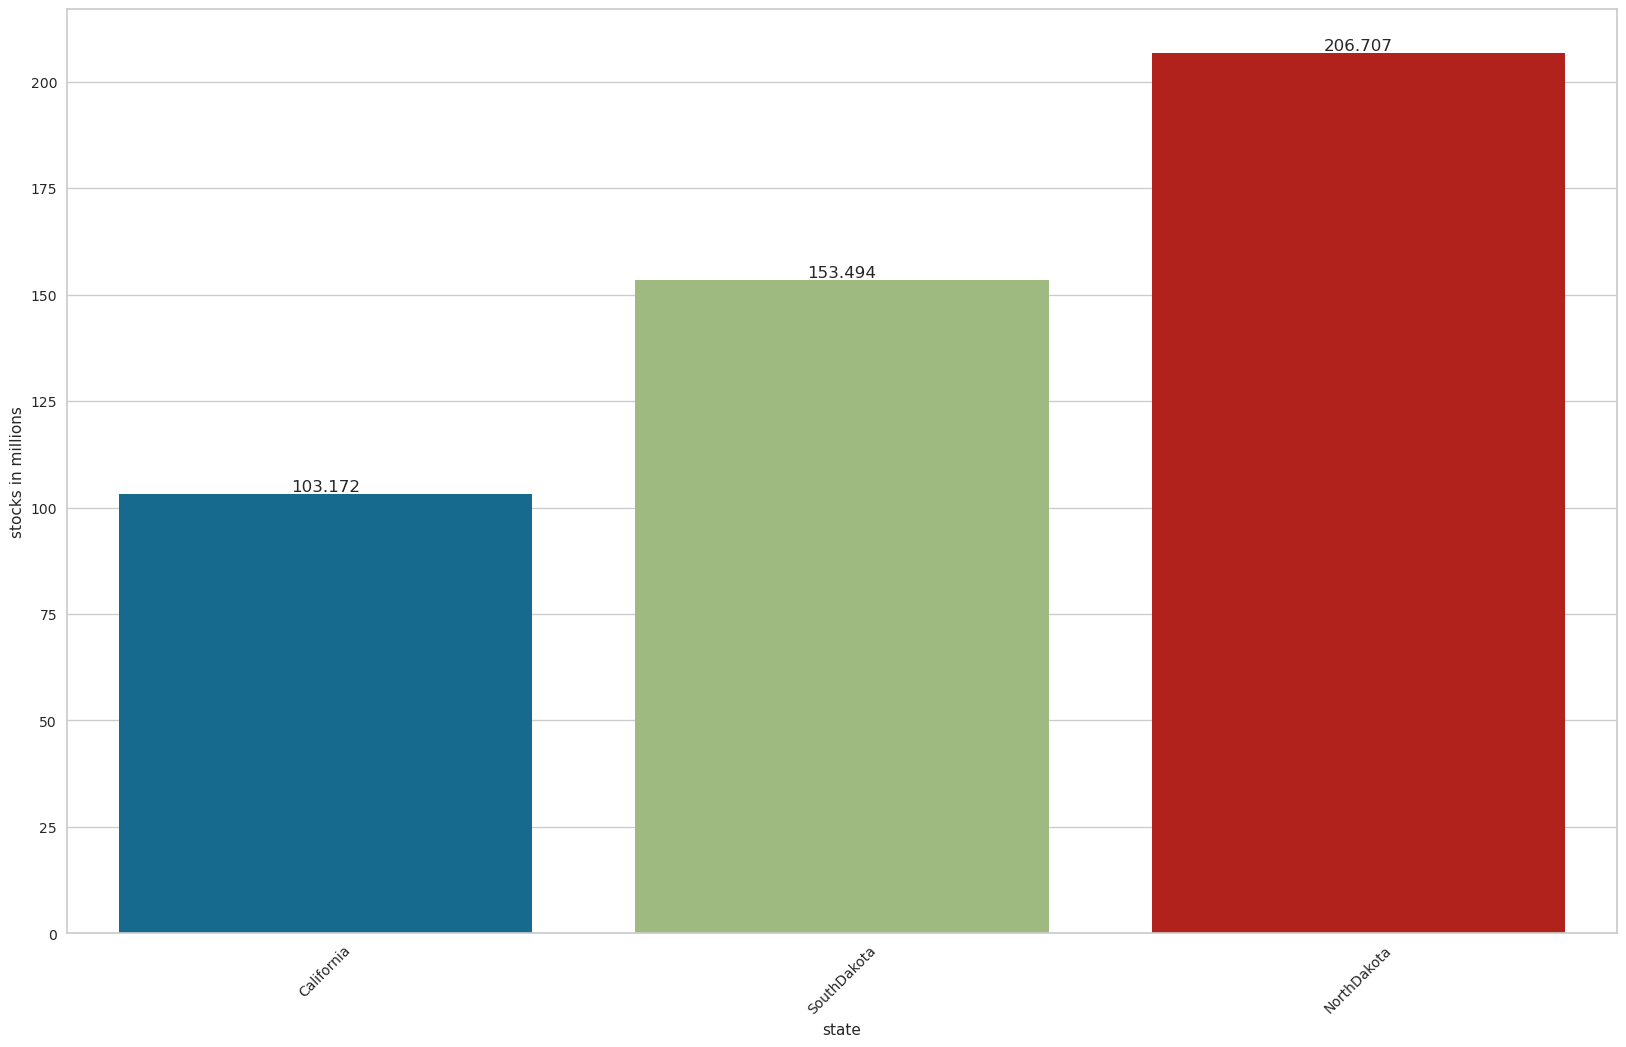

In [66]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(c4, x = 'state',y = 'stocks in millions',order = c4.sort_values('stocks in millions').state)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

> We can see that Cluster 4 have highest productive states

> Let's visualize through years

In [67]:
cc1 = Cluster1.groupby('year').sum()
cc1 = cc1.reset_index()
cc1['stocks in millions'] = cc1['stocks']/1000000
cc1.sort_values(by = 'stocks in millions',ascending = False).head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,stocks in millions
12,2011,887000,1608,14154000,14154000,7346.0,87505000,14.154
14,2013,956000,1481,14017000,14017000,8560.0,107442000,14.017
13,2012,917000,1653,13533000,13533000,7956.0,99064000,13.533
17,2016,1142000,1668,13437000,13437000,10253.0,136210000,13.437
11,2010,920000,1571,13215000,13215000,6345.0,80602000,13.215


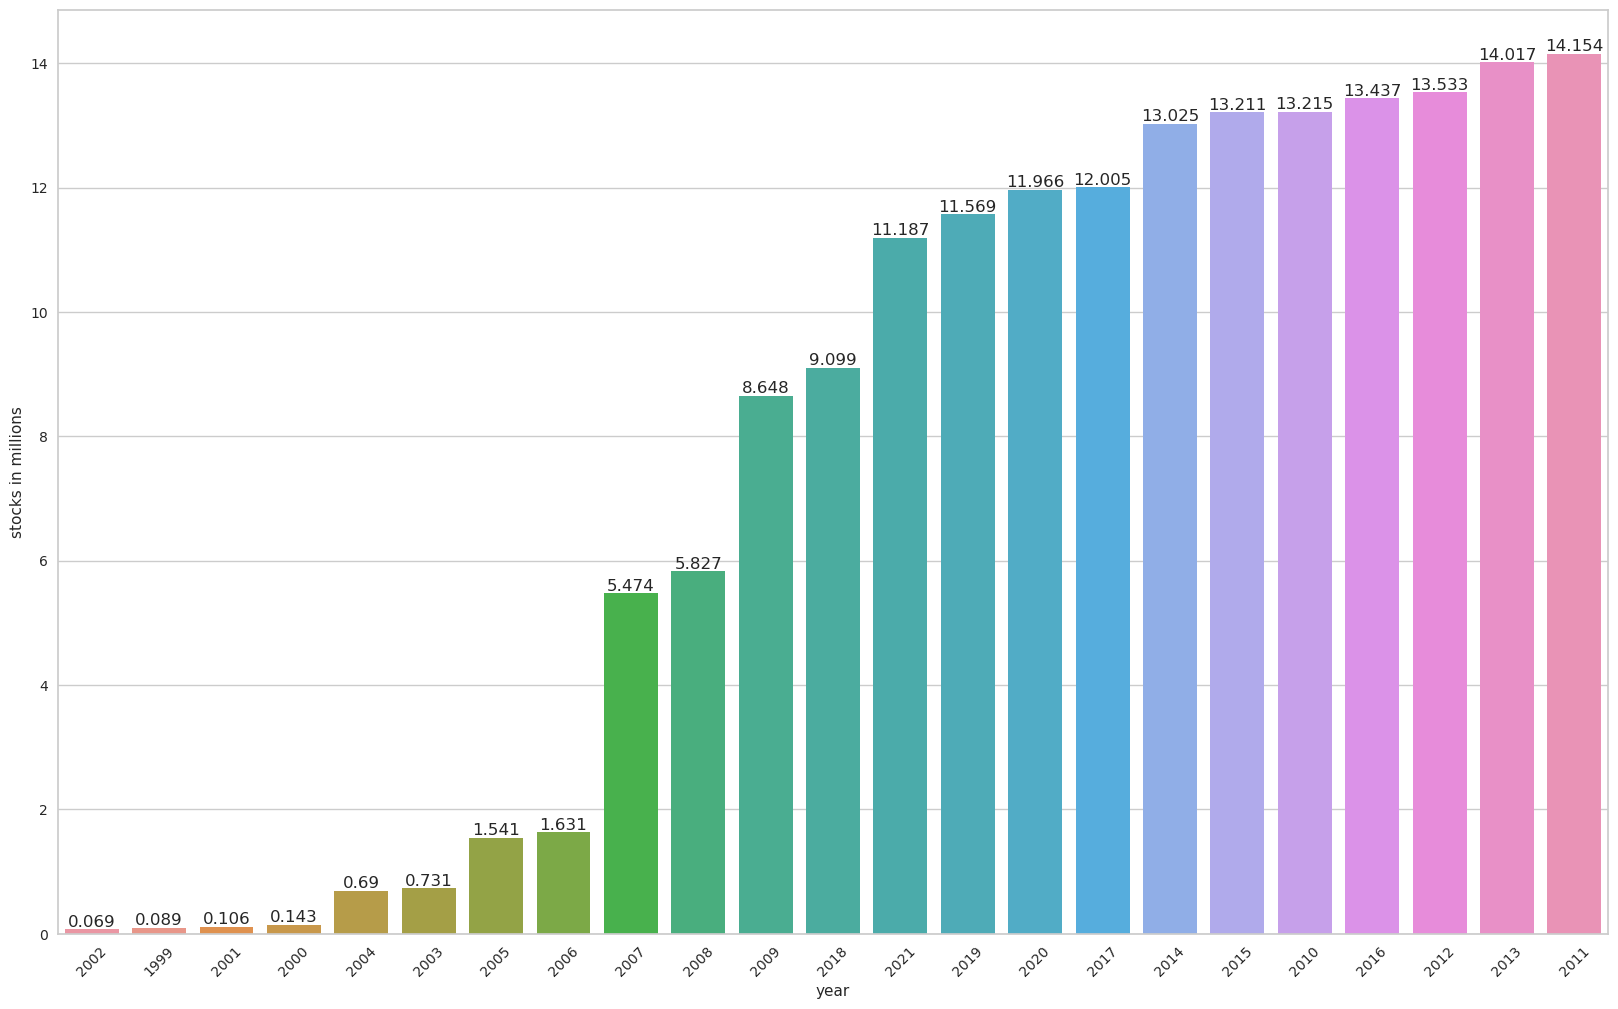

In [68]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(cc1, x = 'year',y = 'stocks in millions',order = cc1.sort_values('stocks in millions').year)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [69]:
cc2 = Cluster2.groupby('year').sum()
cc2 = cc2.reset_index()
cc2['stocks in millions'] = cc2['stocks']/1000000
cc2.sort_values(by = 'stocks in millions',ascending = False).head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,stocks in millions
2,1997,826000,431,65069000,20906000,370.0,48090000,20.906
3,1998,574000,390,55729000,18009000,265.0,36425000,18.009
11,2006,652000,287,44773000,17646000,372.0,41908000,17.646
18,2013,1104000,302,16473000,16473000,1029.0,127182000,16.473
5,2000,635000,360,58883000,14996000,227.0,33087000,14.996


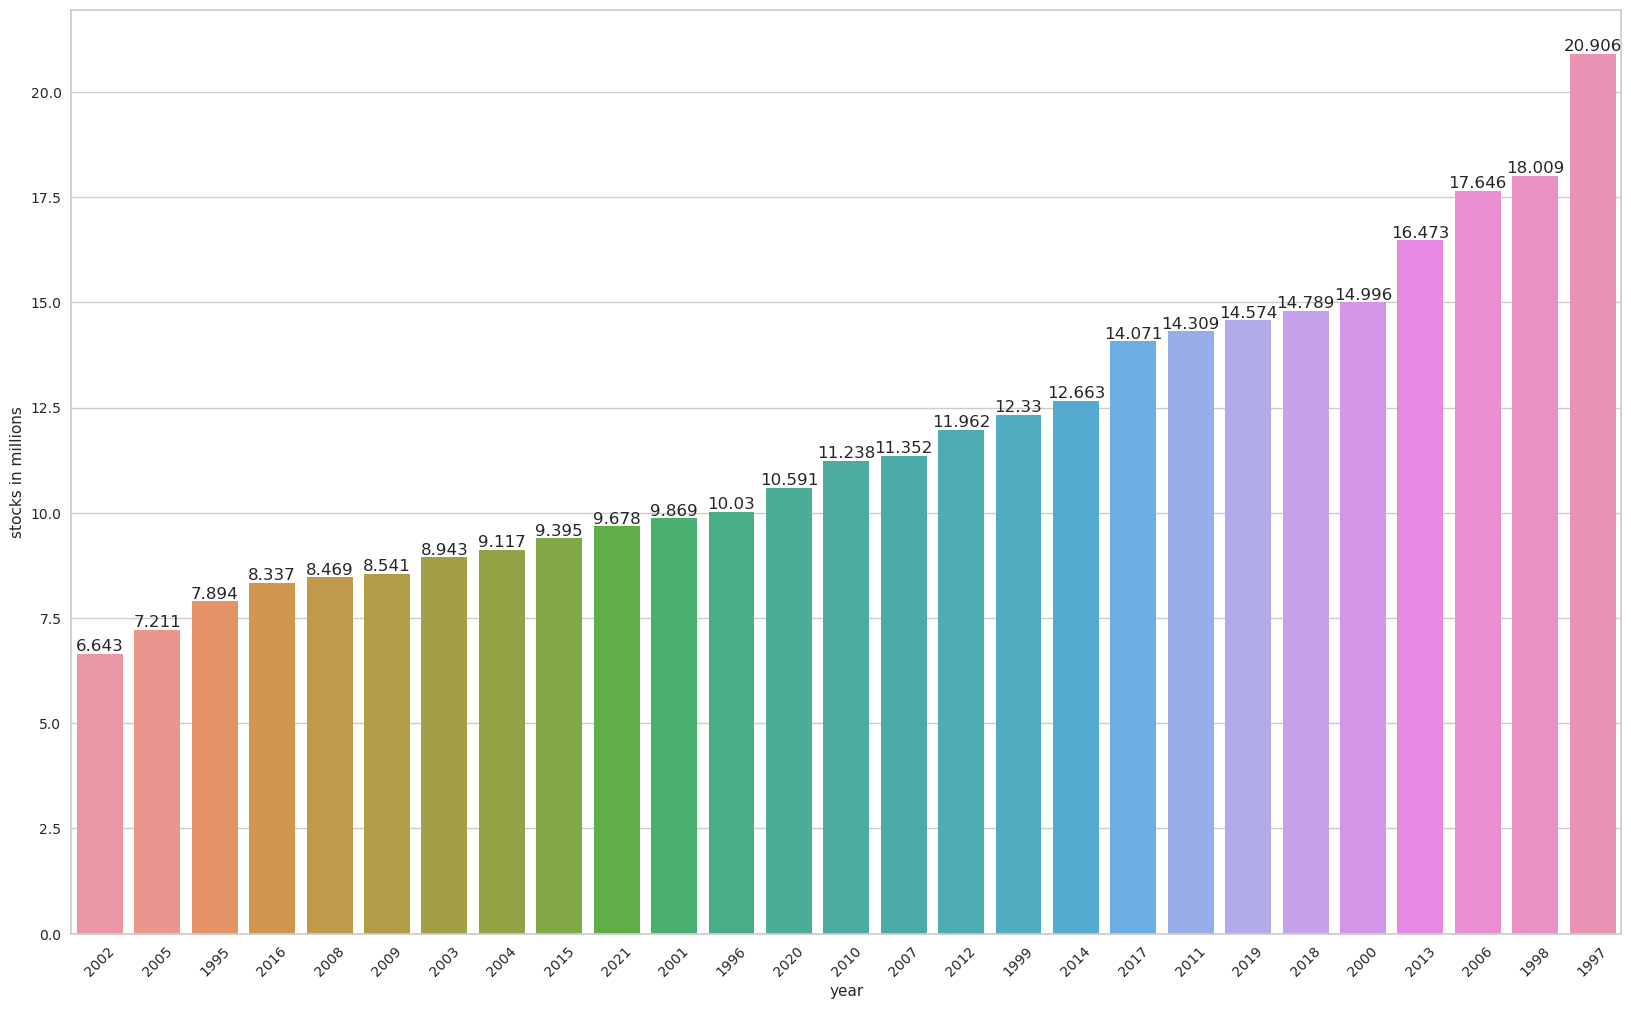

In [70]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(cc2, x = 'year',y = 'stocks in millions',order = cc2.sort_values('stocks in millions').year)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [71]:
cc3 = Cluster3.groupby('year').sum()
cc3 = cc3.reset_index()
cc3['stocks in millions'] = cc3['stocks']/1000000
cc3.sort_values(by = 'stocks in millions',ascending = False).head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,stocks in millions
4,1999,1073000,2189,71472000,34504000,2961.0,47795000,34.504
5,2000,1006000,2217,68621000,33217000,2925.0,45014000,33.217
2,1997,1094000,2359,71607000,31598000,3413.0,58378000,31.598
3,1998,1139000,2312,75427000,30406000,3146.0,54189000,30.406
0,1995,1364000,2490,93742000,25747000,2976.0,64268000,25.747


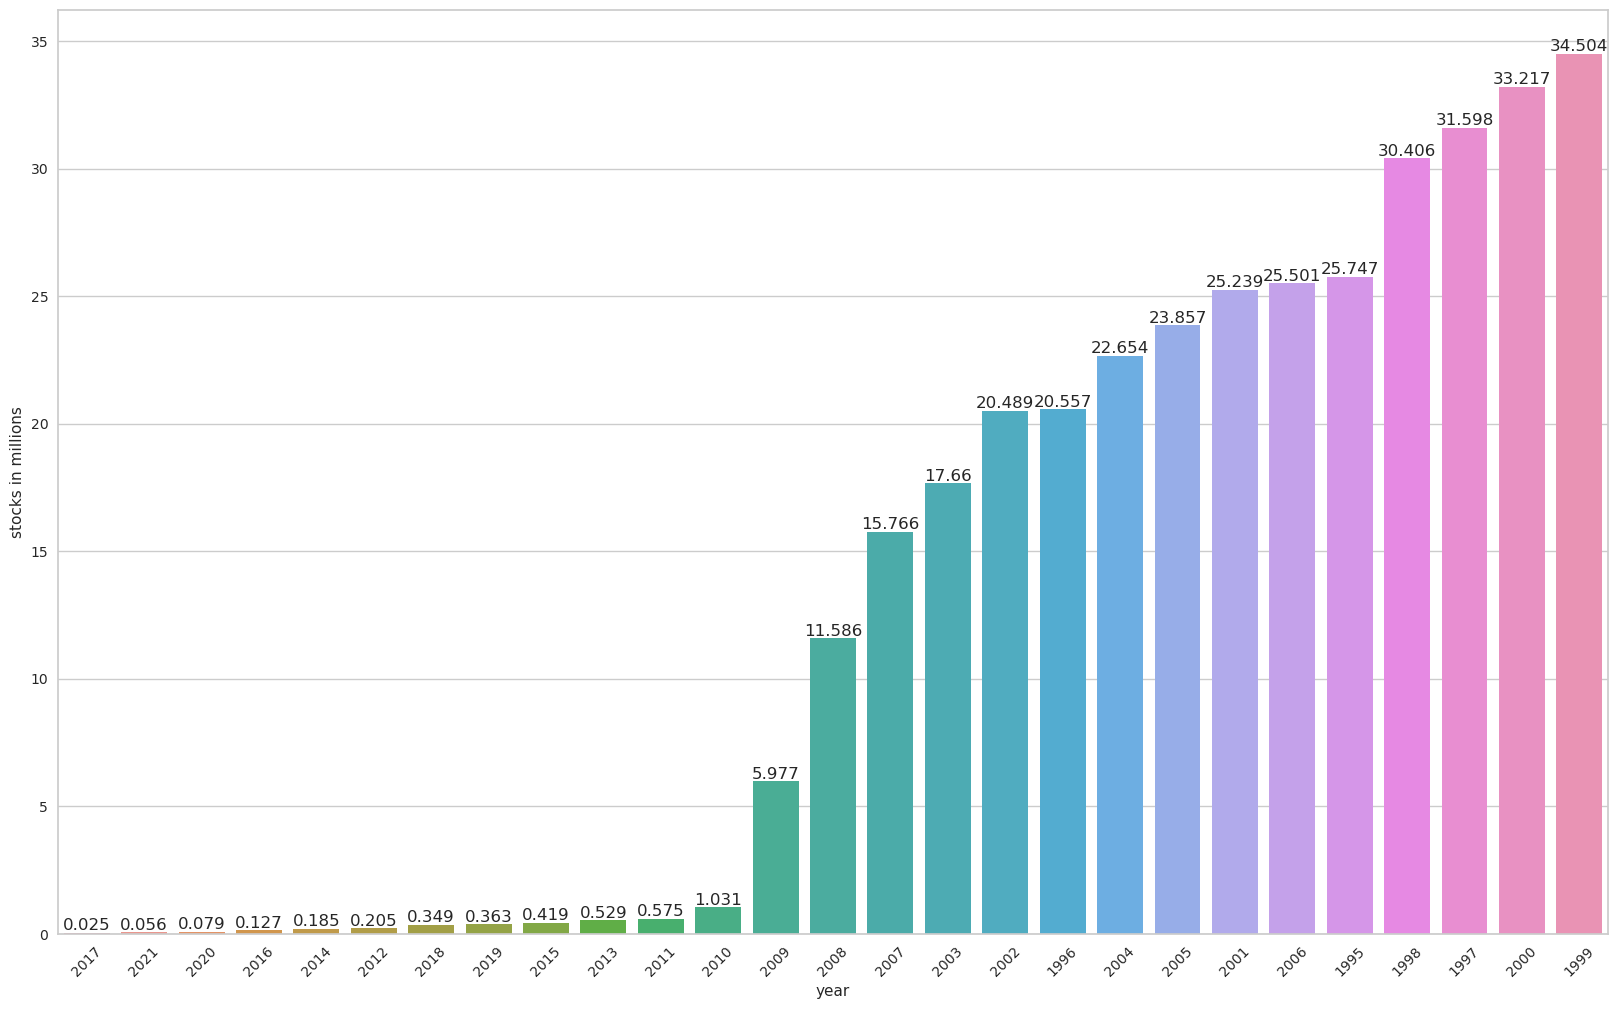

In [72]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(cc3, x = 'year',y = 'stocks in millions',order = cc3.sort_values('stocks in millions').year)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [73]:
cc4 = Cluster4.groupby('year').sum()
cc4 = cc4.reset_index()
cc4['stocks in millions'] = cc4['stocks']/1000000
cc4.sort_values(by = 'stocks in millions',ascending = False).head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,stocks in millions
5,2000,965000,306,92585000,37532000,171.0,52748000,37.532
4,1999,984000,269,80371000,32184000,172.0,45834000,32.184
3,1998,905000,306,88165000,32059000,189.0,55384000,32.059
10,2005,990000,245,81050000,29536000,241.0,65682000,29.536
6,2001,940000,226,69780000,29363000,196.0,45757000,29.363


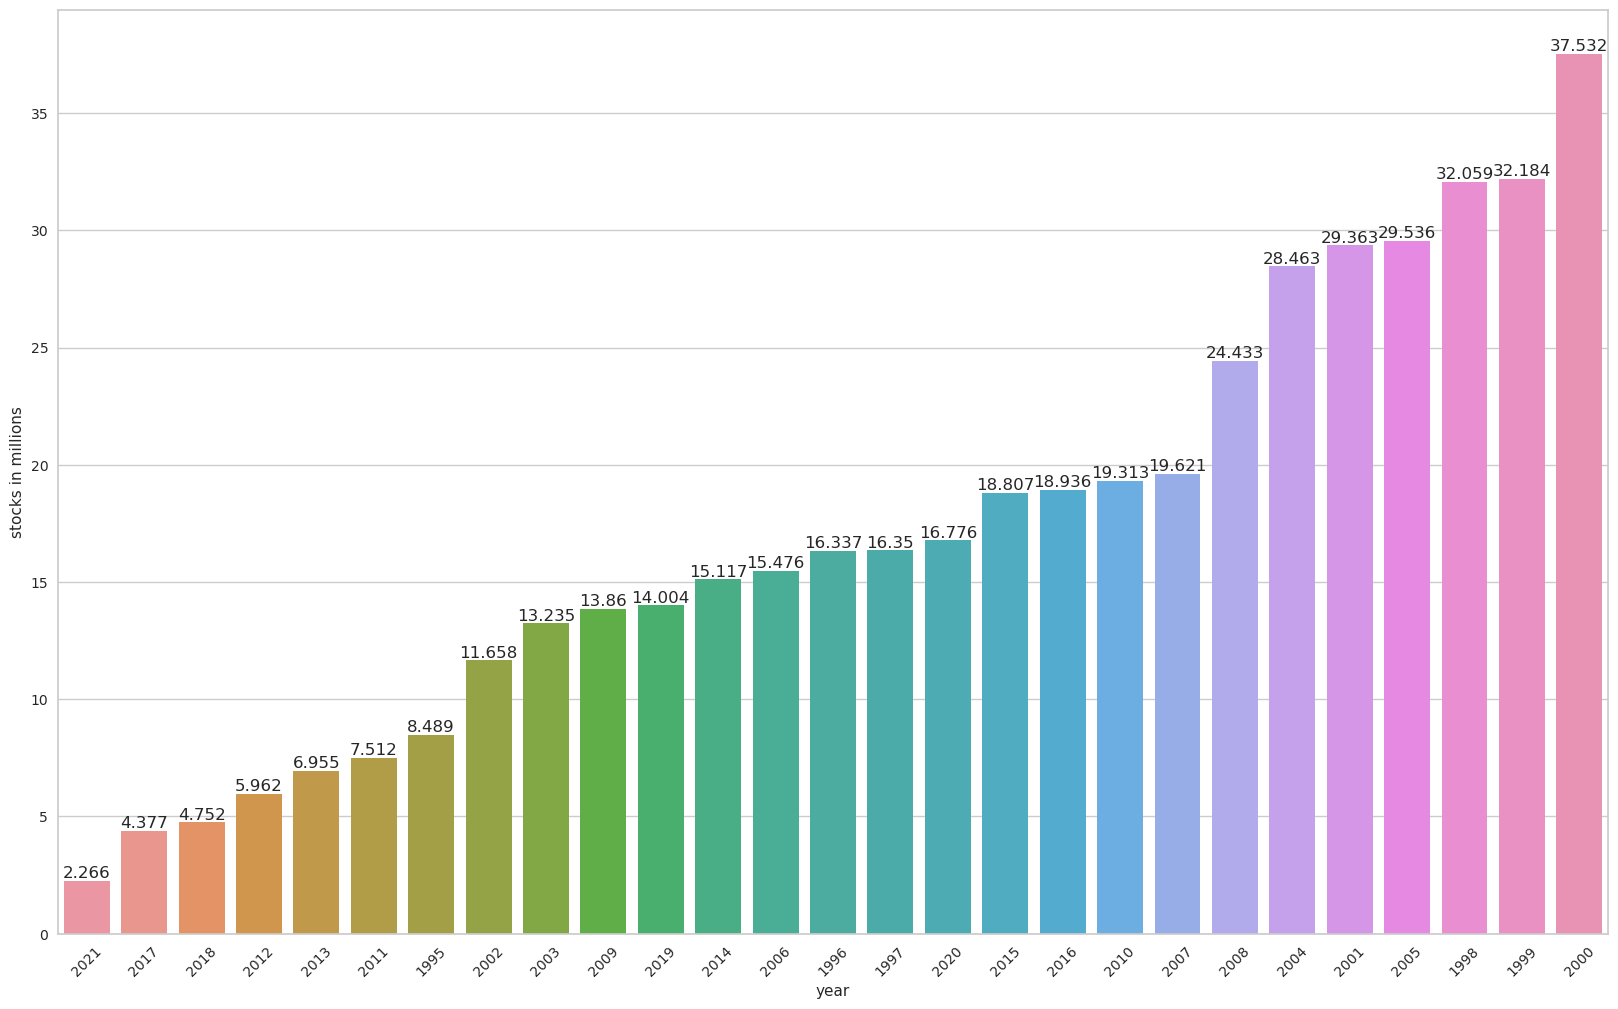

In [74]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(cc4, x = 'year',y = 'stocks in millions',order = cc4.sort_values('stocks in millions').year)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

> No exact inferences can be taken from the above visualizations

> Let's see the realtion of each cluster with state, production, stocks, and colonies number

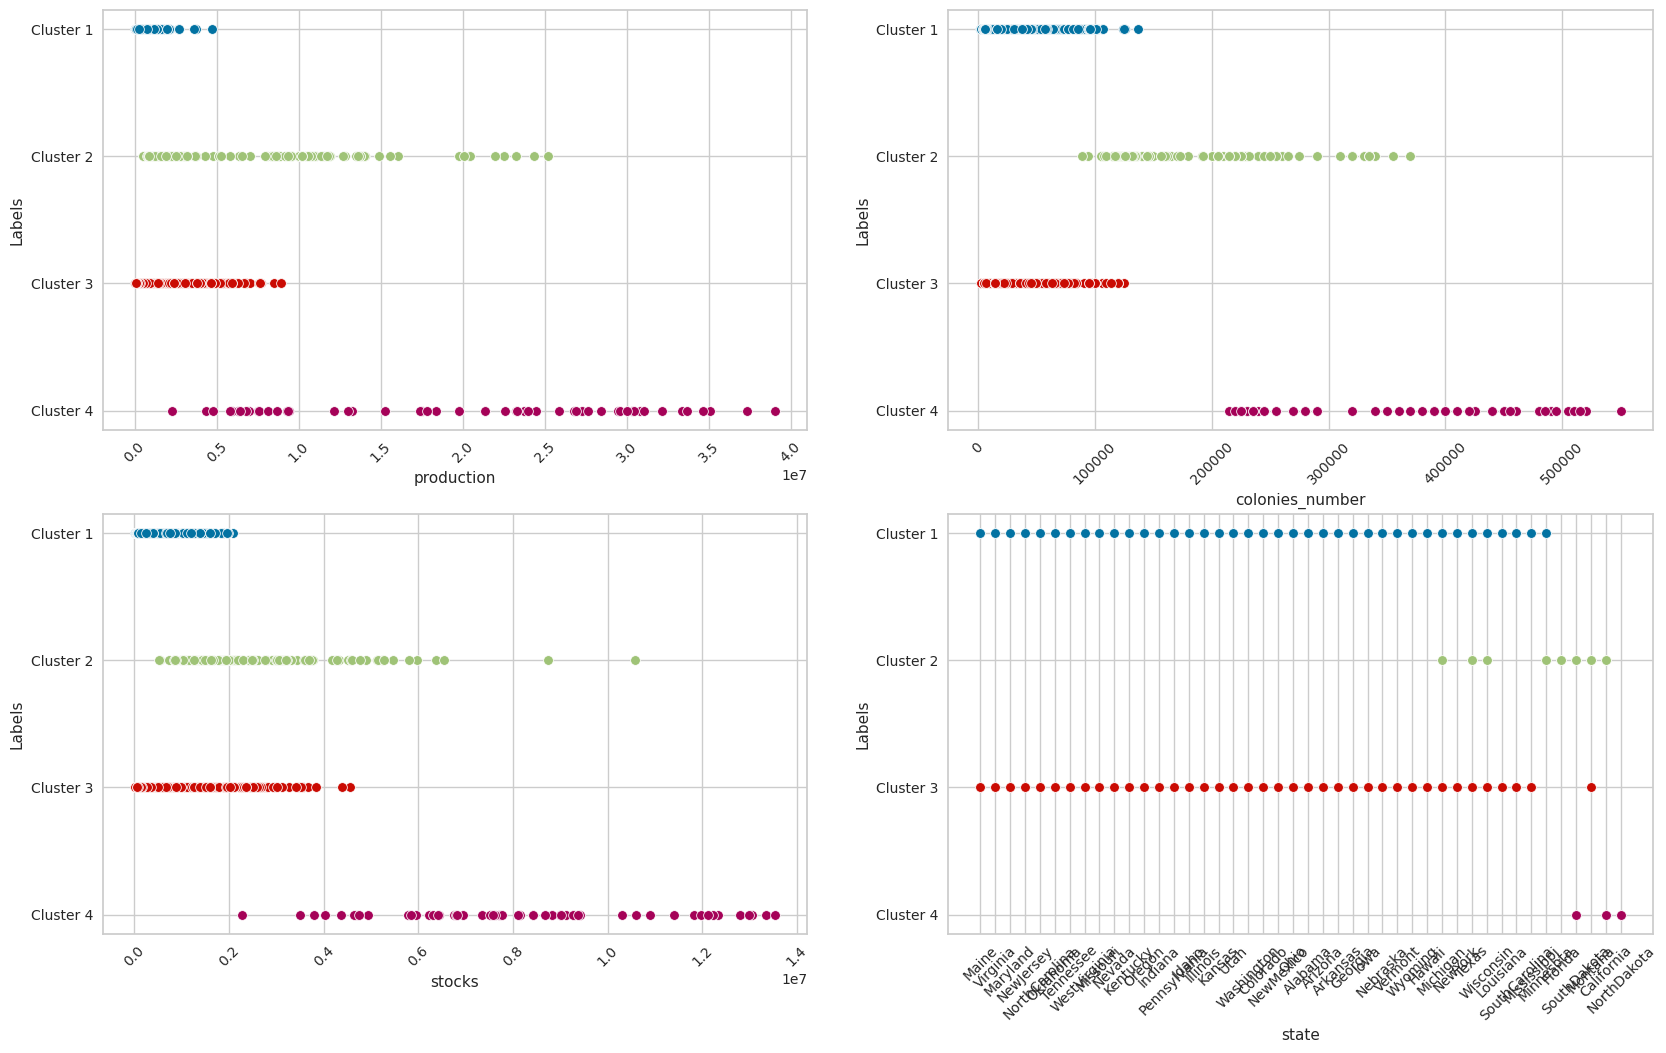

In [75]:
plt.rcParams["figure.figsize"] = (20,12)

plt.subplot(2,2,1)
sns.scatterplot(Cluster1,x = 'production',y = 'Labels')
sns.scatterplot(Cluster2, x = 'production',y = 'Labels')
sns.scatterplot(Cluster3, x = 'production',y = 'Labels')
sns.scatterplot(Cluster4, x = 'production',y = 'Labels')
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.scatterplot(Cluster1,x = 'colonies_number',y = 'Labels')
sns.scatterplot(Cluster2,x = 'colonies_number',y = 'Labels')
sns.scatterplot(Cluster3,x = 'colonies_number',y = 'Labels')
sns.scatterplot(Cluster4,x = 'colonies_number',y = 'Labels')
plt.xticks(rotation = 45)

plt.subplot(2,2,3)
sns.scatterplot(Cluster1,x = 'stocks',y = 'Labels')
sns.scatterplot(Cluster2,x = 'stocks',y = 'Labels')
sns.scatterplot(Cluster3,x = 'stocks',y = 'Labels')
sns.scatterplot(Cluster4,x = 'stocks',y = 'Labels')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(Cluster1,x = 'state',y = 'Labels')
sns.scatterplot(Cluster2,x = 'state',y = 'Labels')
sns.scatterplot(Cluster3,x = 'state',y = 'Labels')
sns.scatterplot(Cluster4,x = 'state',y = 'Labels')

plt.xticks(rotation = 45)
plt.show()

> From the above visualization,we can conclude that , clusters of states are made on the basis of colonies numbers. But, still clusters are not very separated clearly. 

In [76]:
print("Cluster 1 states :\n\n",list(c1['state']))

Cluster 1 states :

 ['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'SouthCarolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']


In [77]:
print("Cluster 2 states :\n\n",list(c2['state']))

Cluster 2 states :

 ['California', 'Florida', 'Michigan', 'Minnesota', 'Montana', 'SouthDakota', 'Texas', 'Wisconsin']


In [78]:
print("Cluster 3 states :\n\n",list(c3['state']))

Cluster 3 states :

 ['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'SouthCarolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']


In [79]:
print("Cluster 4 states :\n\n",list(c4['state']))

Cluster 4 states :

 ['California', 'NorthDakota', 'SouthDakota']


> There are high resemblance between cluster 1 and cluster 3. Still, cannot find that on what basis the clusters are made, and what should be the clusters named. 

In [80]:
l1 = []
for i in c1['state']:
    l1.append(i)

l2 = []
for j in c2['state']:
    l2.append(j)
    
l3 = []
for k in c3['state']:
    l3.append(k)
    
l4 = []
for l in c4['state']:
    l4.append(l)
    


In [81]:
common = pd.DataFrame([l1,l2,l3,l4])
common = common.transpose()
common = pd.DataFrame(common.values,columns = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
common

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Alabama,California,Alabama,California
1,Arizona,Florida,Arizona,NorthDakota
2,Arkansas,Michigan,Arkansas,SouthDakota
3,Colorado,Minnesota,Colorado,None
4,Georgia,Montana,Georgia,None
5,Hawaii,SouthDakota,Hawaii,None
6,Idaho,Texas,Idaho,None
7,Illinois,Wisconsin,Illinois,None
8,Indiana,None,Indiana,None
9,Iowa,None,Iowa,None


In [82]:
common.isnull().sum()

Cluster 1     0
Cluster 2    31
Cluster 3     0
Cluster 4    36
dtype: int64

In [83]:
common = common.fillna(value = 'NA')
common

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Alabama,California,Alabama,California
1,Arizona,Florida,Arizona,NorthDakota
2,Arkansas,Michigan,Arkansas,SouthDakota
3,Colorado,Minnesota,Colorado,NA
4,Georgia,Montana,Georgia,NA
5,Hawaii,SouthDakota,Hawaii,NA
6,Idaho,Texas,Idaho,NA
7,Illinois,Wisconsin,Illinois,NA
8,Indiana,NA,Indiana,NA
9,Iowa,NA,Iowa,NA


In [84]:
union = pd.Series(np.union1d(common['Cluster 1'],common['Cluster 3']))
intersect = pd.Series(np.intersect1d(common['Cluster 1'],common['Cluster 3']))
notcommon1 = union[~union.isin(intersect)]

> Uncommon states between cluster 1 and cluster 3

In [85]:
notcommon1

16    Minnesota
19      Montana
dtype: object

> Uncommon states between cluster 2 and cluster 4

In [86]:
union = pd.Series(np.union1d(common['Cluster 2'],common['Cluster 4']))
intersect = pd.Series(np.intersect1d(common['Cluster 2'],common['Cluster 4']))
notcommon2 = union[~union.isin(intersect)]
notcommon2

1        Florida
2       Michigan
3      Minnesota
4        Montana
6    NorthDakota
8          Texas
9      Wisconsin
dtype: object